In [2]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/MSDS Classes/ML1_MSDS2024/Final Project/'

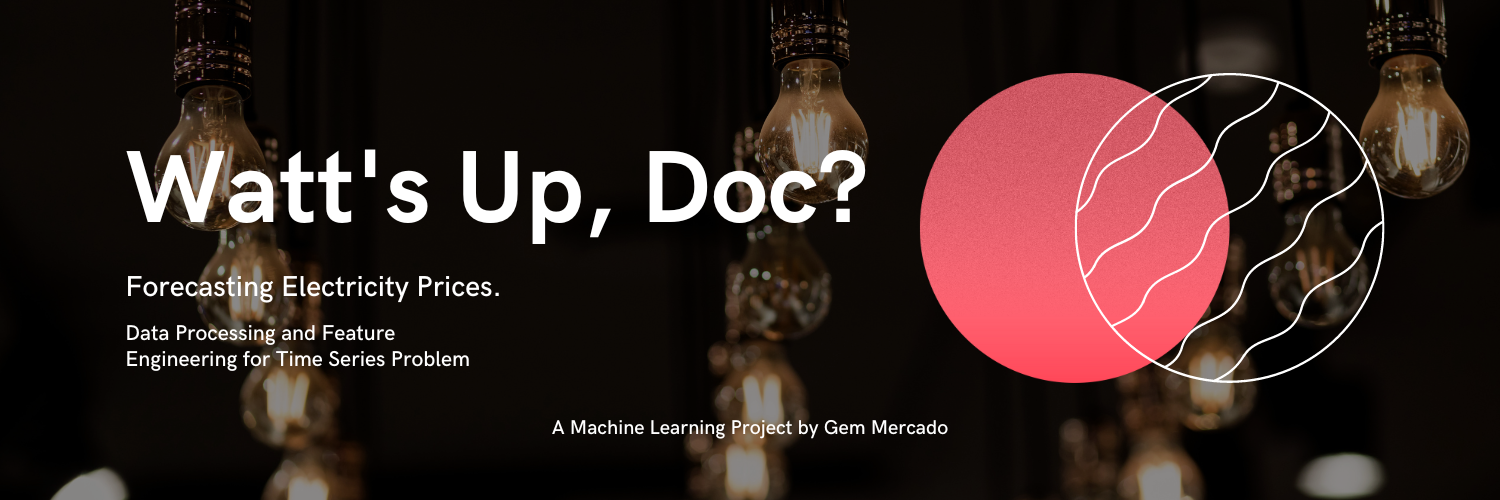

In [3]:
from IPython.display import Image
Image(filename=data_dir +'header.png')

The dataset was retrieved from Kaggle: [Hourly energy demand generation and weather](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?select=energy_dataset.csv). This dataset contains 4 years of electrical consumption, generation, and pricing for Spain.


<h1 style="background-color: black; color: white; padding: 10px;"><b>Description of the Problem</b></h1>
k-Nearest Neighbors (kNN), Linear Regression (including L1 and L2), Decision Tree, Random Forest, and Gradient Boosting Methods (along with its variations), are models that inherently struggle with extrapolation, particularly in the context of time series forecasting. This study aims to develop a specialized Data Preprocessing and Feature Engineering Pipeline tailored for time series challenges, with a focus on forecasting electricity prices. Our objective is to create a process for the models to enhance their ability in interpreting and predicting time-based data through appropriate feature engineering and preprocessing techniques. In this case, it is to be able to predict the hourly prices for the next 21 days.

<h1 style="background-color: black; color: white; padding: 10px;"><b>Highlights</b></h1>
This study delves into solving Time Series Machine Learning issues, focusing on Feature Engineering and Data Preprocessing for such problems. Key aspects include:

1. **DateTime Extraction**: Extracting and utilizing date-time data.
2. **Lag Variable Integration**: Incorporating lag variables for better predictions.

The study emphasizes **Mean Absolute Error (MAE)** as the crucial metric for evaluating Time Series models, given its accuracy in measuring prediction errors.

<h1 style="background-color: black; color: white; padding: 10px;"><b>Methodology: The Machine Learning Pipeline</b></h1>

### **Data Exploration**
The data was explored in terms of how the features initially behaved, and how much the independent variables are correlated with each other, and how the independent variables are correlated with the target variable. This section emphasizes the use of the Pearson Correlation Coefficient Heatmap to address potential multicollinearities.

### **Data Preprocessing: Manual**
Subsequently executed with the Data Exploration, this section looks into the assesment of NaN Variables and potential Categorical Variables. Unlike the Feature Engineering in the next section, Data Processing was not subjected to automation (i.e., creation of functions).


### **Feature Engineering: Automated**
This section tackles the core of the study by integrating variables that are crucial to solving Time Series problems. The column containing information about the date was assessed, then was subjected to extraction by year, month, day, hour, and weekday.

This section also tackles the integration of Lag Variables. Lag Variables enable the model to utilize the previous immediate data points, thereby increasing predictability of the next datapoint.

### **Subjecting the Final Dataset to the Models**
Eight models were used for the study, namely:

* **k-Nearest Neighbors (kNN)**
* **Linear Regression**
* **Linear Regression with L1 Regularization**
* **Linear Regression with L2 Regularization**
* **Decision Tree**
* **Random Forest**
* **Gradient Boosting Method**
* **XGBoost**

For the purpose of demonstrating the effectiveness of Feature Engineering and meticulous Data Preprocessing, the hyperparameters of the models were left on default.

<h1 style="background-color: black; color: white; padding: 10px;"><b>Execution of Methodology</b></h1>

### **Data Exploration**

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_energy = pd.read_csv(data_dir +'energy.csv')
df_weather = pd.read_csv(data_dir +'weather.csv')

In [5]:
# What's your main DataFrame? Energy.
df = df_energy.copy()

In [6]:
f'The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns'

'The dataset consists of 35064 rows and 29 columns'

In [7]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

<ipython-input-8-601d89e1d09e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


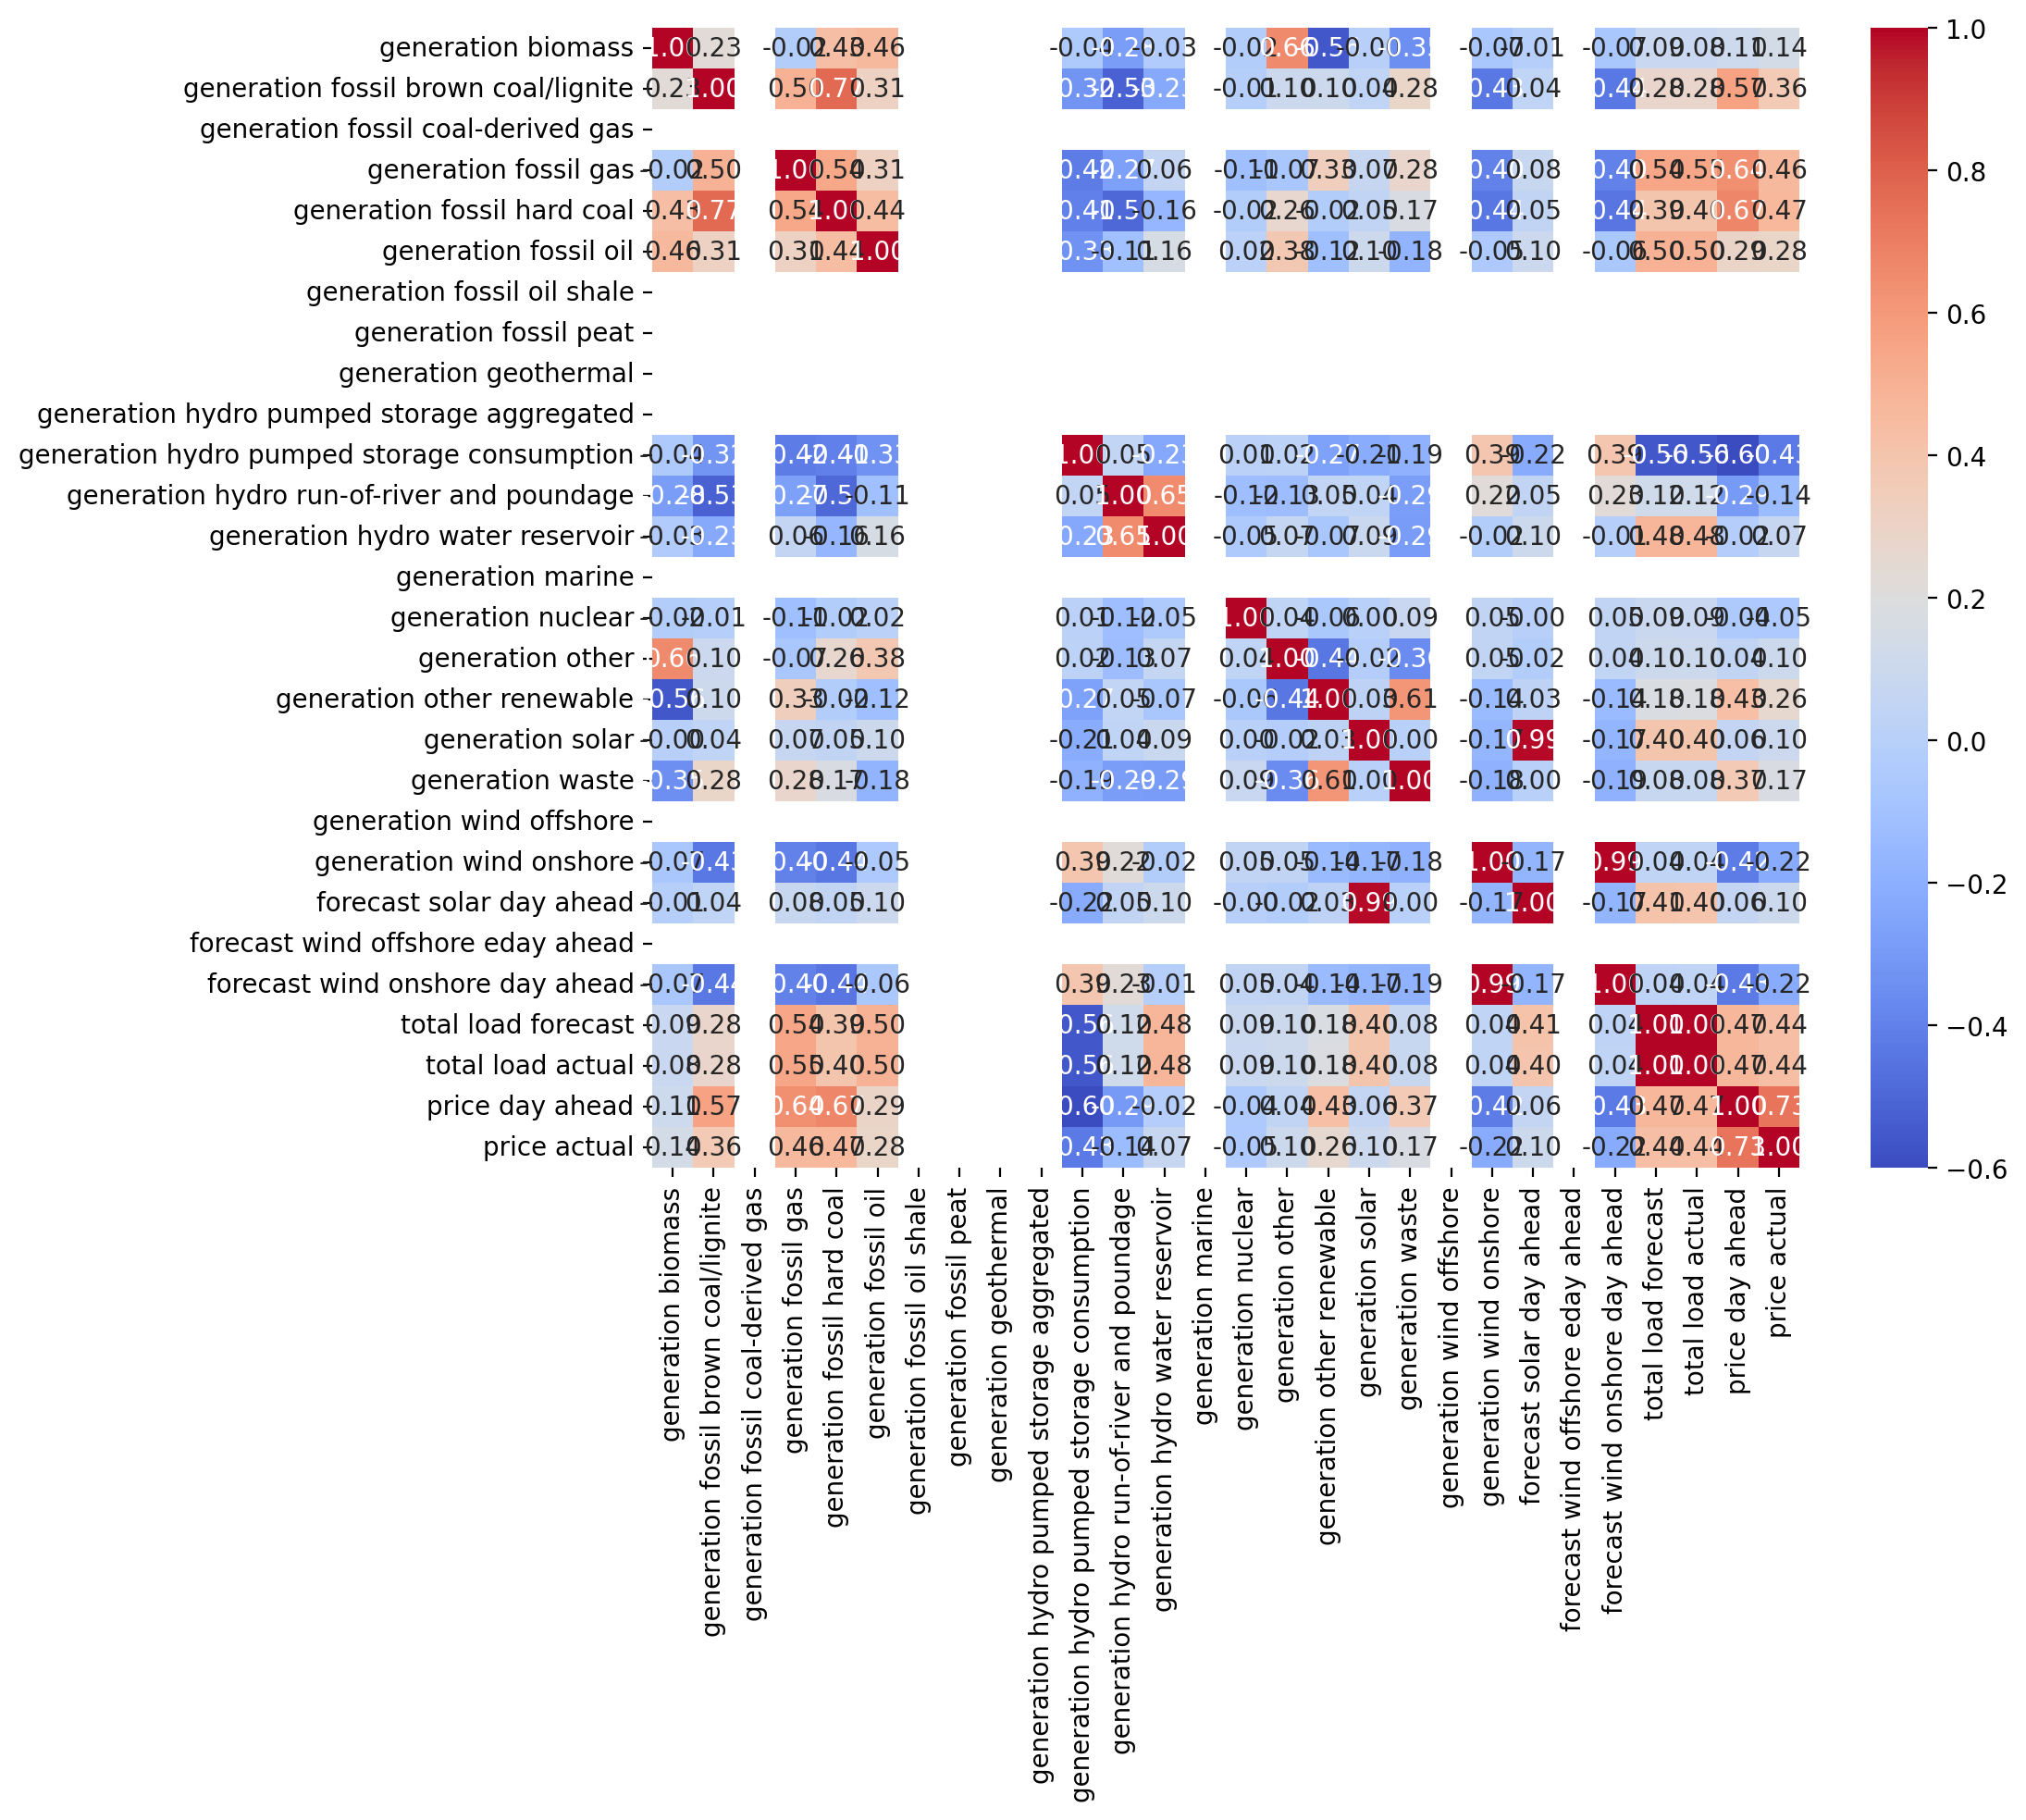

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Calculate the Pearson correlation coefficients
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

# Show the plot
plt.show()

### **Data Preprocessing (Manually Done)**

#### Addressing Missing Values

In [9]:
# Determine first the dtype of each column
for i in df.columns:
  print(f'{i}: {df[i].dtype}')

time: object
generation biomass: float64
generation fossil brown coal/lignite: float64
generation fossil coal-derived gas: float64
generation fossil gas: float64
generation fossil hard coal: float64
generation fossil oil: float64
generation fossil oil shale: float64
generation fossil peat: float64
generation geothermal: float64
generation hydro pumped storage aggregated: float64
generation hydro pumped storage consumption: float64
generation hydro run-of-river and poundage: float64
generation hydro water reservoir: float64
generation marine: float64
generation nuclear: float64
generation other: float64
generation other renewable: float64
generation solar: float64
generation waste: float64
generation wind offshore: float64
generation wind onshore: float64
forecast solar day ahead: float64
forecast wind offshore eday ahead: float64
forecast wind onshore day ahead: float64
total load forecast: float64
total load actual: float64
price day ahead: float64
price actual: float64


In [10]:
# Count the NaN values per each column
df.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

`generation hydro pumped storage aggregated` and `forecast wind offshore eday ahead` are fully NaN values. It should be dropped completely.

In [11]:
# Remove the columns filled with NaNs
df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], axis=1, inplace=True)

In [12]:
df.isna().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [13]:
nan_rows = len(df[df.isna().any(axis=1)])
total_rows = len(df)

print(f'No. of rows with NaN values: {nan_rows}\nTotal Rows: {total_rows}')
print(f'{nan_rows} / {total_rows} = {nan_rows/total_rows:.2%} rows are NaN values')
print(f'Total Rows if NaN Rows are dropped: {total_rows - nan_rows}')

No. of rows with NaN values: 47
Total Rows: 35064
47 / 35064 = 0.13% rows are NaN values
Total Rows if NaN Rows are dropped: 35017


Decision: Remove NaN values completely

In [14]:
df.dropna(axis=0, inplace=True)

For this section, only 47 rows were emmitted from the 35,064 rows. 35,017 rows remained.

#### Addressing Potential Categorical and Ordinal Values

In [15]:
for i in df.columns:
  if len(df[i].unique()) < 10:
    print(f"{i}: {df[i].unique()}")

generation fossil coal-derived gas: [0.]
generation fossil oil shale: [0.]
generation fossil peat: [0.]
generation geothermal: [0.]
generation marine: [0.]
generation wind offshore: [0.]


In [16]:
# Remove the columns mentioned in the previous cell

omit = []
for i in df.columns:
  if len(df[i].unique()) == 1:
    print(f'Dropped: {i}')
    omit.append(i)

df.drop(omit, axis=1, inplace=True)

Dropped: generation fossil coal-derived gas
Dropped: generation fossil oil shale
Dropped: generation fossil peat
Dropped: generation geothermal
Dropped: generation marine
Dropped: generation wind offshore


From this section, we discovered that there are only zeros in the mentioned columns. They serve no purpose to the model whatsoever. Subsequently, this addressed the initially unusual Pearson Correlation Coefficient Heatmap seen from Data Exploration section. We can compare it to the Heatmap succeeding below this text.

#### Other Potentially Unnecessary Variables

<ipython-input-17-601d89e1d09e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


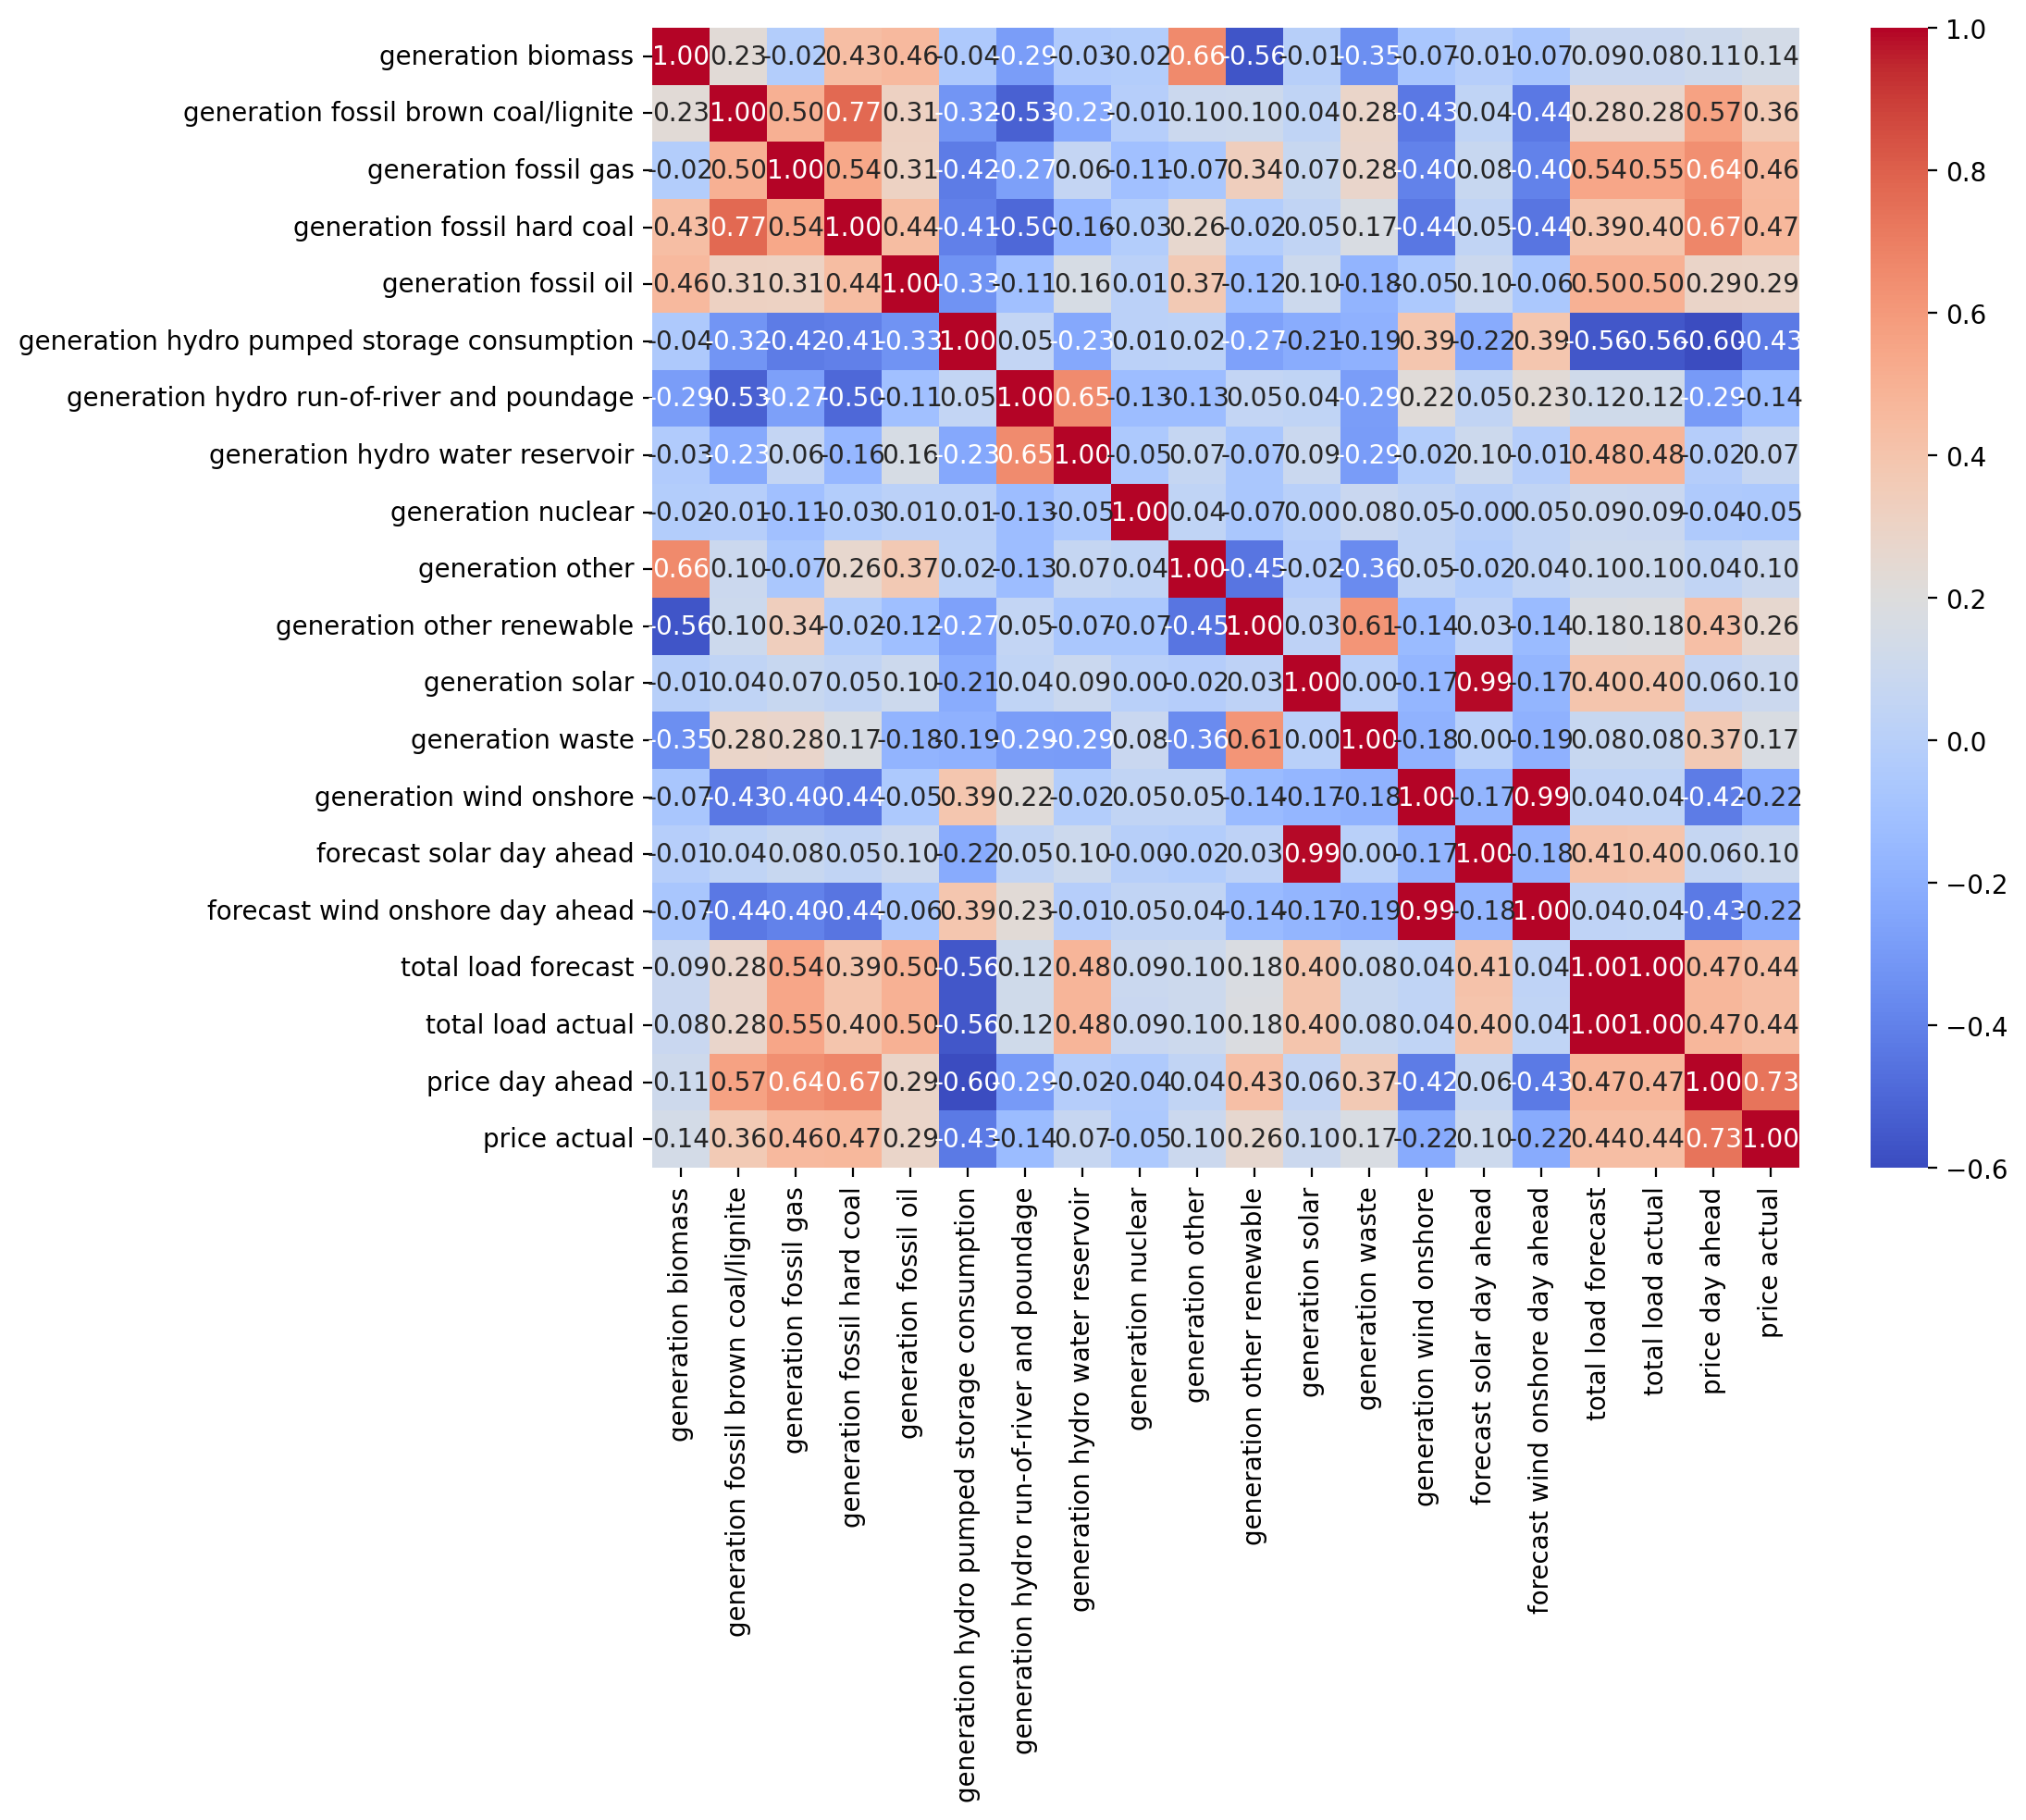

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Calculate the Pearson correlation coefficients
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

# Show the plot
plt.show()

Inspecting the Heatmap with the processed dataset, we see that `total load forecast`, `total load actual`, `price day ahead` are strongly correlated with the `price actual`, because they refer to future references. Therefore, we should also remove other columns that refer to future information, such as the following: `forecast solar day ahead`, `forecast wind onshore day ahead`

The model's purpose would be defeated if we base our forecasts on forecasts.

<ipython-input-18-907f53e963b4>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


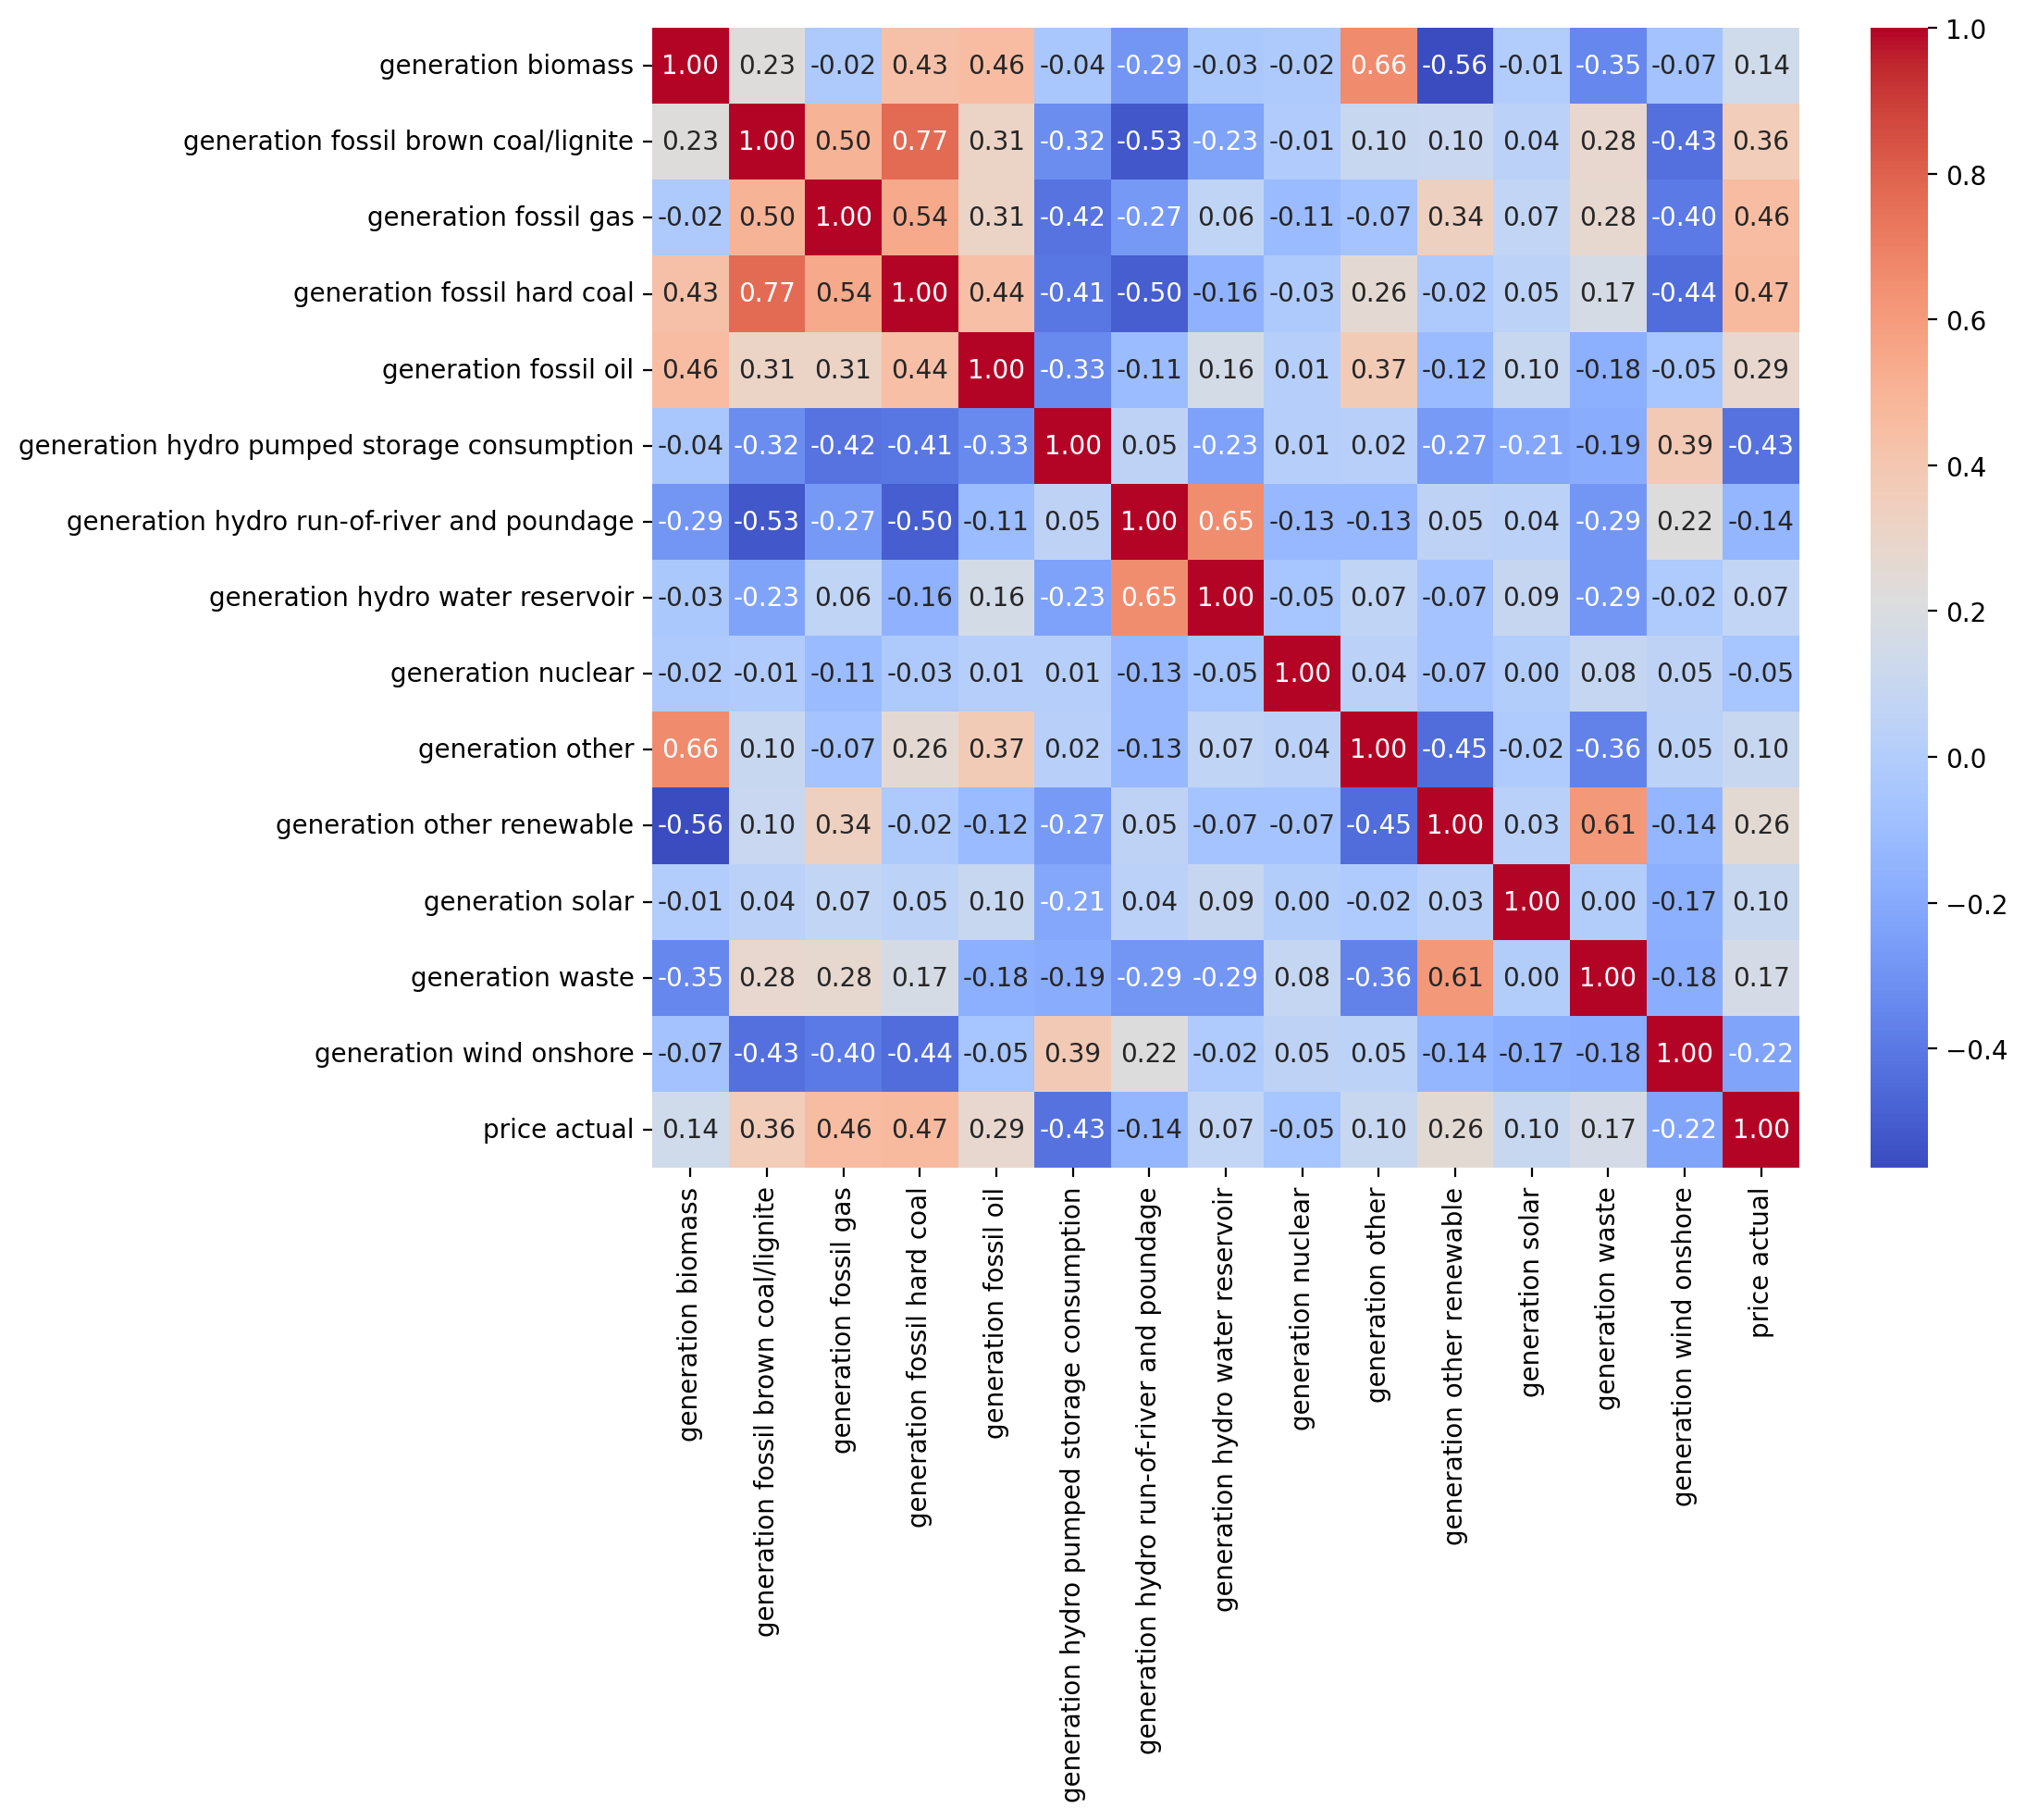

In [18]:
# omitted 'total load forecast', 'total load actual', 'price day ahead'

omit = ['total load forecast', 'total load actual', 'price day ahead',
        'forecast solar day ahead', 'forecast wind onshore day ahead']
df.drop(omit, axis=1, inplace=True)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Calculate the Pearson correlation coefficients
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

# Show the plot
plt.show()

### **Feature Engineering (Automated by Function)**

#### Extract and Integrate DateTime Variables

In [19]:
### Deal with DateTime Variables
# Convert 'time' column to datetime with timezone awareness
df['time'] = pd.to_datetime(df['time'], utc=True)

# Extract time features again
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.weekday

### Reorder DataFrame
# List of columns to move next to 'time'
columns_to_move = ['year', 'month', 'day', 'hour', 'weekday',]

# Current DataFrame columns
current_columns = df.columns.tolist()

# Remove these columns from the current columns list
current_columns = [col for col in current_columns if col not in columns_to_move]

# Insert the columns right after 'time'
time_index = current_columns.index('time')
new_columns_order = current_columns[:time_index + 1] + columns_to_move + current_columns[time_index + 1:]

# Reorder DataFrame columns
df = df[new_columns_order]

In [20]:
df.head()

time  year  month  day  hour  weekday  \
0 2014-12-31 23:00:00+00:00  2014     12   31    23        2   
1 2015-01-01 00:00:00+00:00  2015      1    1     0        3   
2 2015-01-01 01:00:00+00:00  2015      1    1     1        3   
3 2015-01-01 02:00:00+00:00  2015      1    1     2        3   
4 2015-01-01 03:00:00+00:00  2015      1    1     3        3   

   generation biomass  generation fossil brown coal/lignite  \
0               447.0                                 329.0   
1               449.0                                 328.0   
2               448.0                                 323.0   
3               438.0                                 254.0   
4               428.0                                 187.0   

   generation fossil gas  generation fossil hard coal  ...  \
0                 4844.0                       4821.0  ...   
1                 5196.0                       4755.0  ...   
2                 4857.0                       4581.0  ...   
3                 4314.0                       4131.0  ...   
4                 4130.0                       3840.0  ...   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  generation other  \
0                            1899.0              7096.0              43.0   
1                            1658.0              7096.0              43.0   
2                            1371.0              7099.0              43.0   
3                             779.0              7098.0              43.0   
4                             720.0              7097.0              43.0   

   generation other renewable  generation solar  generation waste  \
0                        73.0              49.0             196.0   
1                        71.0              50.0             195.0   
2                        73.0              50.0             196.0   
3                        75.0              50.0             191.0   
4                        74.0              42.0             189.0   

   generation wind onshore  price actual  
0                   6378.0         65.41  
1                   5890.0         64.92  
2                   5461.0         64.48  
3                   5238.0         59.32  
4                   4935.0         56.04  

[5 rows x 21 columns]

#### Integrate Lag Variables

In [21]:
lag_hours = 7

for lag in range(1, lag_hours + 1):
    df[f'lag_{lag}'] = df['price actual'].shift(lag)

df.dropna(inplace=True)

# Reorder DataFrame columns
cols = list(df.columns)
cols.remove('price actual')
cols.append('price actual')
df = df[cols]

<ipython-input-21-8a472389522b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df['price actual'].shift(lag)
<ipython-input-21-8a472389522b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df['price actual'].shift(lag)
<ipython-input-21-8a472389522b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [22]:
df.head()

time  year  month  day  hour  weekday  \
7  2015-01-01 06:00:00+00:00  2015      1    1     6        3   
8  2015-01-01 07:00:00+00:00  2015      1    1     7        3   
9  2015-01-01 08:00:00+00:00  2015      1    1     8        3   
10 2015-01-01 09:00:00+00:00  2015      1    1     9        3   
11 2015-01-01 10:00:00+00:00  2015      1    1    10        3   

    generation biomass  generation fossil brown coal/lignite  \
7                408.0                                 172.0   
8                413.0                                 177.0   
9                419.0                                 177.0   
10               422.0                                 173.0   
11               421.0                                 226.0   

    generation fossil gas  generation fossil hard coal  ...  generation waste  \
7                  4030.0                       3208.0  ...             189.0   
8                  4052.0                       3335.0  ...             198.0   
9                  4137.0                       3437.0  ...             198.0   
10                 4059.0                       3516.0  ...             204.0   
11                 3931.0                       3845.0  ...             206.0   

    generation wind onshore  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  \
7                    3992.0  51.73  53.63  56.04  59.32  64.48  64.92  65.41   
8                    3629.0  51.43  51.73  53.63  56.04  59.32  64.48  64.92   
9                    3073.0  48.98  51.43  51.73  53.63  56.04  59.32  64.48   
10                   2683.0  54.20  48.98  51.43  51.73  53.63  56.04  59.32   
11                   2771.0  58.94  54.20  48.98  51.43  51.73  53.63  56.04   

    price actual  
7          51.43  
8          48.98  
9          54.20  
10         58.94  
11         59.86  

[5 rows x 28 columns]

#### **The Eight Machine Learning Models**

### **Import the libraries**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt

### **Final Pipeline Functions**
This section only aims to provide a streamlined version of the Pipeline, integrating all the findings and methods done by using the functions found in the `Final Pipleine Functions` section.

`process_df(df)` is only applicable to this dataset. Assuming that you add more X variables for the sake of prediction, this is the code you would use before subjecting it to `create_lag(df, target_col, lag_hours)` and `extract_datetime(df, datetime_col)`

In [24]:
def process_df(df):
  # Removing NaN columns and rows & Removing unimportant variables
  omit = ['generation hydro pumped storage aggregated',
          'forecast wind offshore eday ahead',
          'generation fossil coal-derived gas', 'generation fossil oil shale',
          'generation fossil peat', 'generation geothermal',
          'generation marine', 'generation wind offshore',
          'total load forecast', 'total load actual','price day ahead',
          'forecast solar day ahead', 'forecast wind onshore day ahead']
  df.drop(omit, axis=1, inplace=True)
  df.dropna(axis=0, inplace=True)
  return df

def extract_datetime(df, datetime_col):
    # Check if the time column exists
    if datetime_col not in df.columns:
        raise ValueError(f"The specified time column '{datetime_col}' does not exist in the DataFrame.")

    # Convert the time column to datetime with timezone awareness
    df[datetime_col] = pd.to_datetime(df[datetime_col], utc=True)

    # Extract time features
    df['year'] = df[datetime_col].dt.year
    df['month'] = df[datetime_col].dt.month
    df['day'] = df[datetime_col].dt.day
    df['hour'] = df[datetime_col].dt.hour
    df['weekday'] = df[datetime_col].dt.weekday

    # List of columns to move next to the time column
    columns_to_move = ['year', 'month', 'day', 'hour', 'weekday']

    # Current DataFrame columns
    current_columns = df.columns.tolist()

    # Remove these columns from the current columns list
    current_columns = [col for col in current_columns if col not in columns_to_move]

    # Insert the columns right after the time column
    time_index = current_columns.index(datetime_col)
    new_columns_order = current_columns[:time_index + 1] + columns_to_move + current_columns[time_index + 1:]

    # Reorder DataFrame columns
    df = df[new_columns_order]

    return df

def create_lag(df, target_col, lag_hours):
    # Lagged values
    for lag in range(1, lag_hours + 1):
        df[f'lag_{lag}'] = df[target_col].shift(lag)

    df.dropna(inplace=True)

    # Reorder DataFrame columns
    cols = list(df.columns)
    cols.remove('price actual')
    cols.append('price actual')
    df = df[cols]
    return df

The `add_rolling_window_features(data, target_col, window_size)` is placed to ensure  integrity of the model and results. However, the specifics of these would not be discussed here.

In [25]:
# Function for Adding Rolling Window Features
def add_rolling_window_features(data, target_col, window_size):
    data[f'{target_col}_rolling_mean'] = data[target_col].rolling(window=window_size).mean()
    data[f'{target_col}_rolling_median'] = data[target_col].rolling(window=window_size).median()
    data[f'{target_col}_rolling_std'] = data[target_col].rolling(window=window_size).std()

    # Replace NaN values generated by rolling function
    data.fillna(method='bfill', inplace=True)

    return data

### **Creating the Model Assessment: Baseline MAE Function**

When assessing the model's usefulness, we use Mean Absolute Error (MAE) instead of R-Squared. MAE provides a direct, interpretable metric of average error, making it more suitable for assessing the practical impact of prediction errors, whereas R-squared, being a relative measure of fit, is more about explaining the variance in the dependent variable by the independent variables, and can sometimes be misleading in the context of time series predictive accuracy.

In this case, we use the assumption 'price today, price tomorrow', and this is shown by `data[target_col].shift(1)`

In [26]:
def add_baseline_prediction(data, target_col):
    data['baseline_prediction'] = data[target_col].shift(1)
    return data

### **Apply all the functions to the original dataset**
This section only aims to demonstrate the streamlining of the Pipeline, in conjunction to the `Final Pipleine Functions` section.

In [27]:
# Prepare Dataset
df_2 = df_energy.copy()

# Initial ommitting of variables
df_2 = process_df(df_2)

# Extract DateTime
df_2 = extract_datetime(df_2, 'time')

# Create Lag Variables
df_2 = create_lag(df_2, 'price actual', lag_hours=7)

# Add rolling window (not discussed)
df_2 = add_rolling_window_features(df_2, 'price actual', window_size=24)

# Add MAE Baseline
df_2 = add_baseline_prediction(df_2, 'price actual')
df_2.dropna(subset=['baseline_prediction'], inplace=True)

<ipython-input-24-d8903184fff9>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df[target_col].shift(lag)
<ipython-input-24-d8903184fff9>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{lag}'] = df[target_col].shift(lag)
<ipython-input-24-d8903184fff9>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

### **Assigning X and y**

Specifically for this part, we have to determine how many days we want to predict ahead. In this case, we want to predict the hourly prices of electricity for 21 days.

In [28]:
days = 21

In [29]:
# Splitting the dataset into features and target
X = df_2.drop(['time', 'price actual', 'baseline_prediction'], axis=1)
y = df_2['price actual']

# Splitting the dataset into Train, Validation, and Test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
X_train, X_validation, y_train, y_validation = train_test_split(X_trainval, y_trainval, test_size=0.25, shuffle=False)

# Limit the test set to the specified number of days (21 days)
X_test = X_test.iloc[:days * 24 + 1]
y_test = y_test.iloc[:days * 24 + 1]

### **AutoML and Results**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#For purpose of Demonstration let's just use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y_train)
Lasso = Lasso()
Lasso.fit(X_train, y_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y_train)
#kNN = KNeighborsRegressor(n_neighbors=8)
kNN = KNeighborsRegressor()
kNN.fit(X_train,y_train)
#DT = DecisionTreeRegressor(max_depth=5)
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
#RF = RandomForestRegressor(n_estimators = 100)
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
#GBM = GradientBoostingRegressor(max_depth =5, learning_rate=.1)
GBM = GradientBoostingRegressor()
GBM.fit(X_train,y_train)
#XGB
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

y_pred_LR = LR.predict(X_validation)
y_pred_Lasso = Lasso.predict(X_validation)
y_pred_Ridge = Ridge1.predict(X_validation)
y_pred_kNN = kNN.predict(X_validation)
y_pred_DT = DT.predict(X_validation)
y_pred_RF = RF.predict(X_validation)
y_pred_GBM = GBM.predict(X_validation)
y_pred_XGB = XGB.predict(X_validation)

y_test_LR = LR.predict(X_test)
y_test_Lasso = Lasso.predict(X_test)
y_test_Ridge = Ridge1.predict(X_test)
y_test_kNN = kNN.predict(X_test)
y_test_DT = DT.predict(X_test)
y_test_RF = RF.predict(X_test)
y_test_GBM = GBM.predict(X_test)
y_test_XGB = XGB.predict(X_test)

<h1 style="background-color: black; color: white; padding: 10px;"><b>Results and Discussion</b></h1>

##### In order to assess the model's accuracy and reliability,
we have to employe the Mean Absolute Error (MAE), as discussed in the Methodology section. The score represents the average discrepancy of the model. The lower the MAE score, the better. In this case, we have set the baseline to `2.552`, and this is obtained by using MAE's function from `sklearn.metrics`. Below is the equation of the Mean Absolute Error.

$MAE = \sum_{i=1}^{D}|x_i-y_i|$


If the MAE Test score of the model is below the Baseline MAE, then it is considered a reliable and accurate forecasting model.

For the table below, it is ordered from the most accurate to least accurate(lowest MAE to highest), and it is evident that Gradient Boosting Method had scored below the Baseline MAE by about 0.2. This is followed by Random Forest. The rest, while having low MAE scores, are less reliable than the first two. In this case, kNN has also shown its complete inability to extrapolate, unlike the other models.

It is also peculiar to see that `lag_1`, being the result from the previous hour datapoint, has been the most important feature for the prediction of the succeeding hourly prices. It suggests that short-term historical data plays a crucial role in forecasting future values in all of the tested models. This also indicates that the market or system has a strong temporal component, where recent history is a good indicator of the near future.

In [43]:
# Function to get the most important feature for linear models
def get_most_important_feature_linear(model, X_train):
    coefficients = pd.Series(model.coef_, index=X_train.columns)
    return coefficients.abs().idxmax()

# Function to get the most important feature for tree-based models
def get_most_important_feature_tree(model, X_train):
    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    return importances.idxmax()

# Calculate the MAE for the baseline model
baseline_mae = MAE(df_2['price actual'], df_2['baseline_prediction'])
cols = ['Machine Learning Regression Method', 'MAE Validation',	'MAE Test', 'Most Important Feature']
df3 = pd.DataFrame(columns=cols)

# Add rows for each model with their respective R2 scores and most important feature
df3.loc[0] = ['Linear Regression', MAE(y_validation, y_pred_LR), MAE(y_test, y_test_LR), get_most_important_feature_linear(LR, X_train)]
df3.loc[1] = ['Linear Regression + Lasso', MAE(y_validation, y_pred_Lasso), MAE(y_test, y_test_Lasso), get_most_important_feature_linear(Lasso, X_train)]
df3.loc[2] = ['Linear Regression + Ridge', MAE(y_validation, y_pred_Ridge), MAE(y_test, y_test_Ridge), get_most_important_feature_linear(Ridge1, X_train)]
df3.loc[3] = ['kNN', MAE(y_validation, y_pred_kNN), MAE(y_test, y_test_kNN), 'NA']  # kNN does not have feature importance
df3.loc[4] = ['Decision Tree', MAE(y_validation, y_pred_DT), MAE(y_test, y_test_DT), get_most_important_feature_tree(DT, X_train)]
df3.loc[5] = ['Random Forest', MAE(y_validation, y_pred_RF), MAE(y_test, y_test_RF), get_most_important_feature_tree(RF, X_train)]
df3.loc[6] = ['Gradient Boosting Method', MAE(y_validation, y_pred_GBM), MAE(y_test, y_test_GBM), get_most_important_feature_tree(GBM, X_train)]
df3.loc[7] = ['XGBoost',  MAE(y_validation, y_pred_XGB), MAE(y_test, y_test_XGB), get_most_important_feature_tree(XGB, X_train)]


print(f'Baseline MAE: {baseline_mae}')
# Display the DataFrame
display(df3.sort_values('MAE Test', ascending=True))

Baseline MAE: 2.522180515513944


Machine Learning Regression Method  MAE Validation   MAE Test  \
6           Gradient Boosting Method        1.788075   2.280689   
5                      Random Forest        1.744870   2.324196   
7                            XGBoost        1.755337   2.617817   
1          Linear Regression + Lasso        1.937245   2.642746   
2          Linear Regression + Ridge        1.925822   2.669080   
0                  Linear Regression        1.925834   2.669098   
4                      Decision Tree        2.654942   3.098812   
3                                kNN        9.256880  10.802547   

  Most Important Feature  
6                  lag_1  
5                  lag_1  
7                  lag_1  
1                  lag_1  
2                  lag_1  
0                  lag_1  
4                  lag_1  
3                     NA

##### Visualising the performance of the Machine Learning models, 
we compare the predicted values with the actual values. All of the models, except kNN, have almost mirrored the actual results.

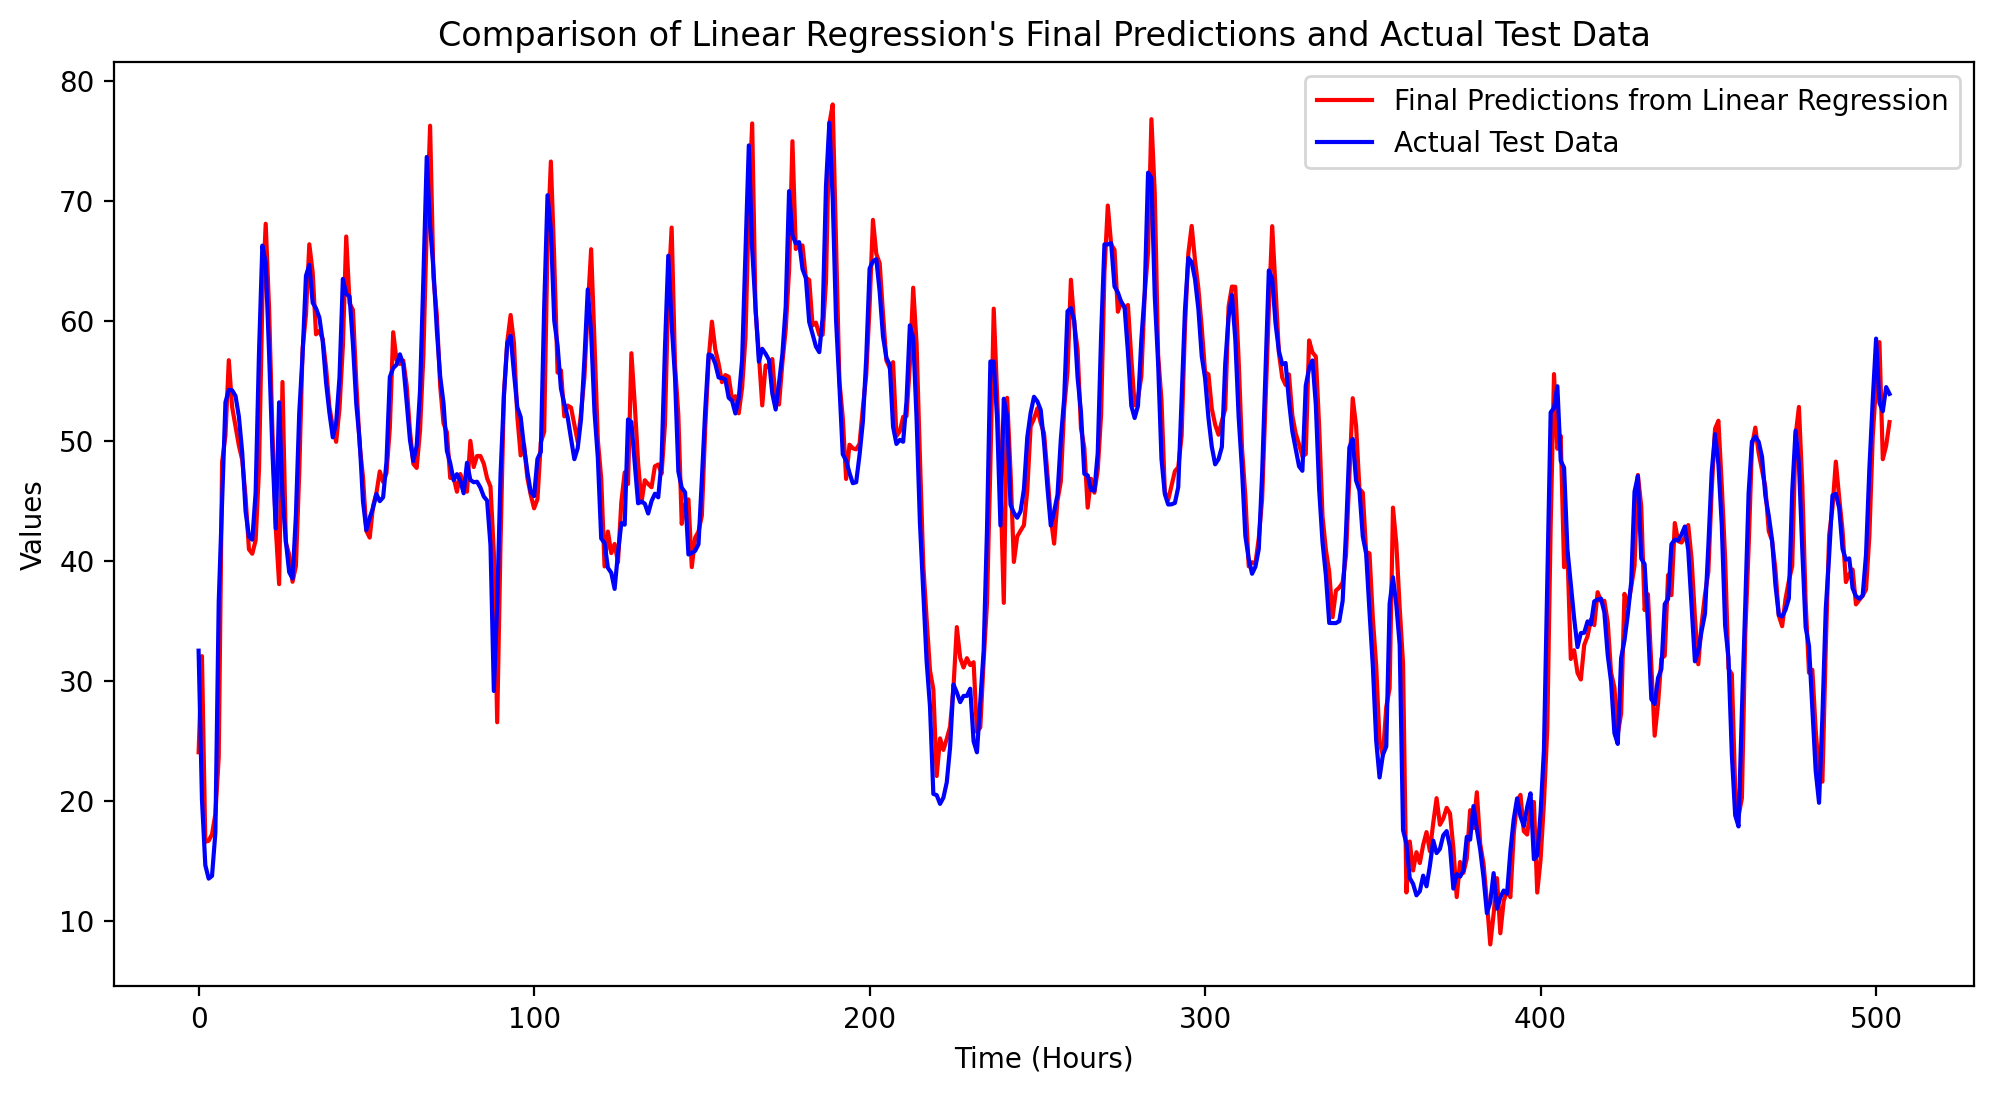

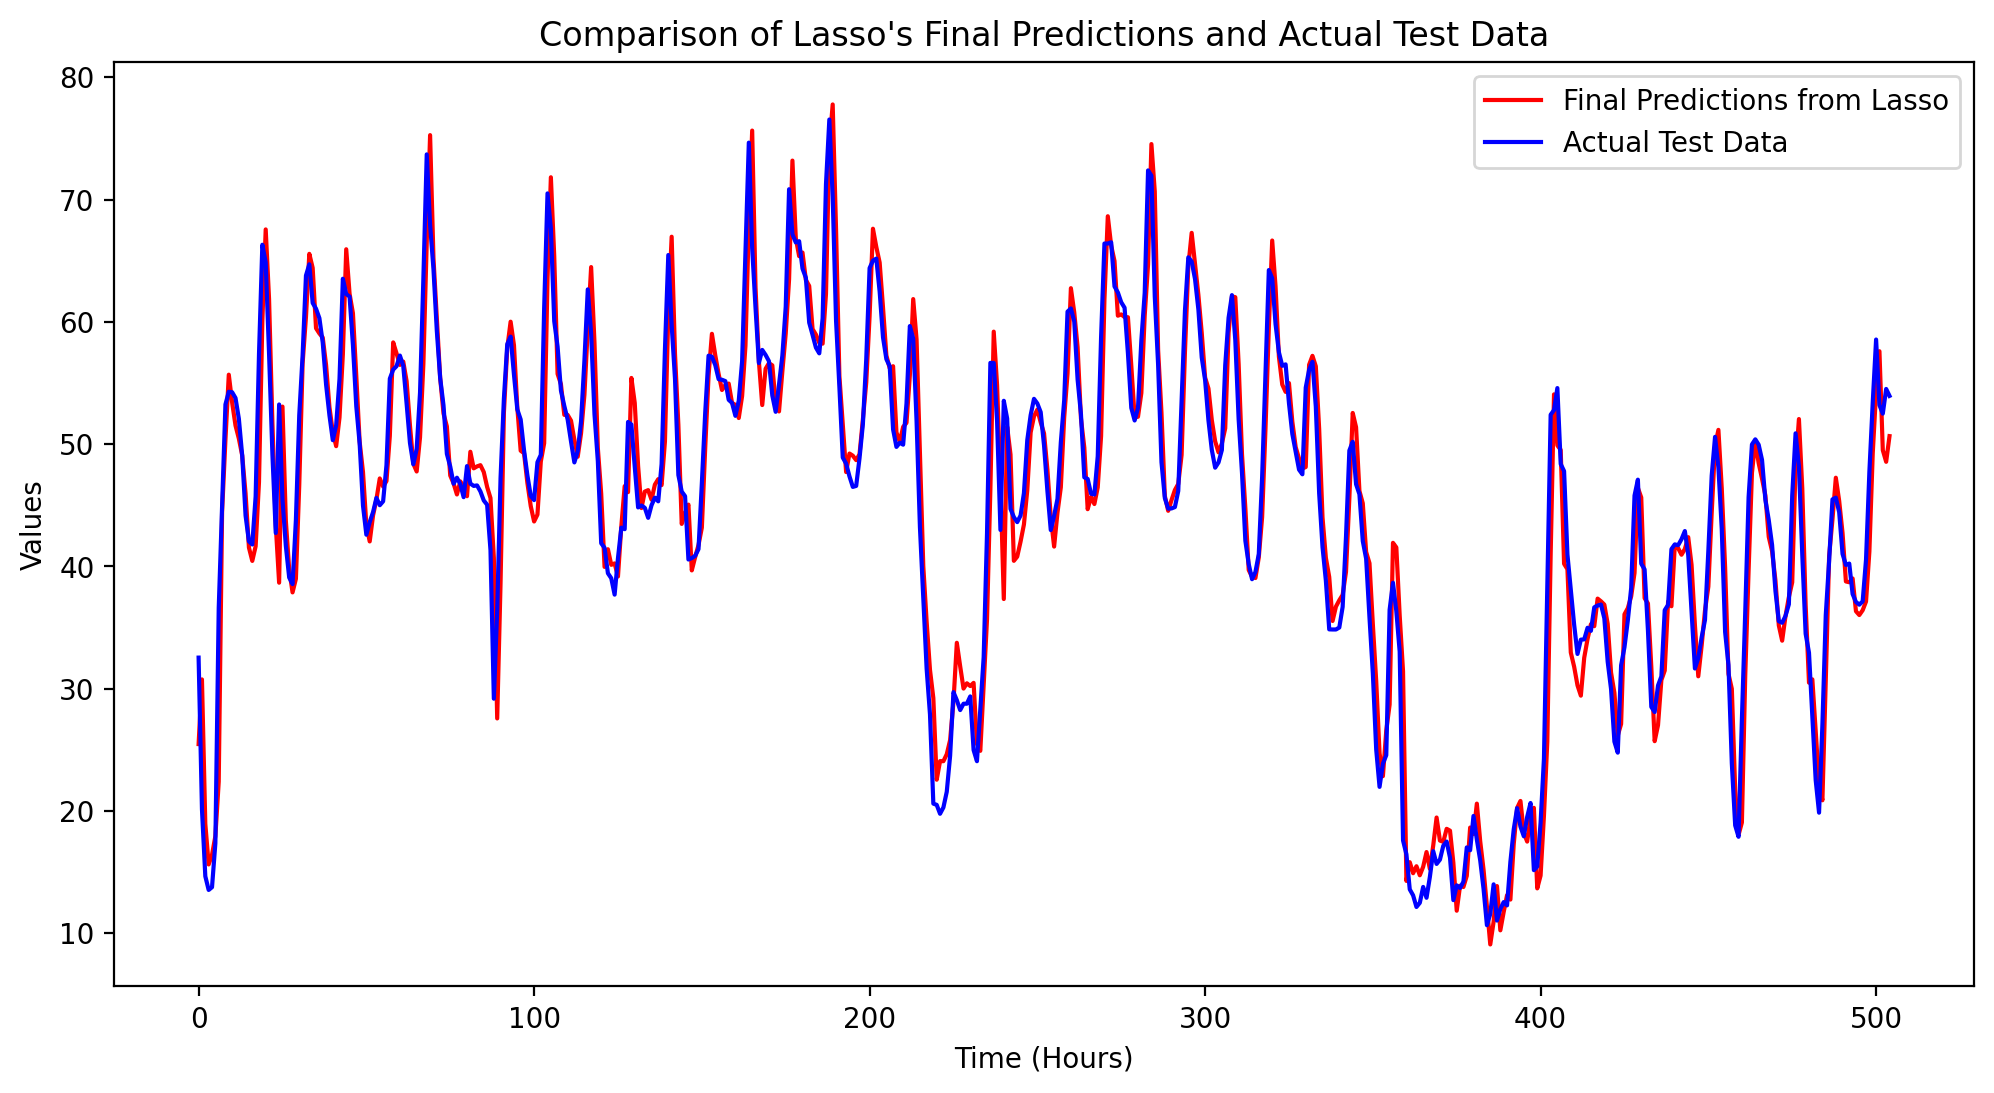

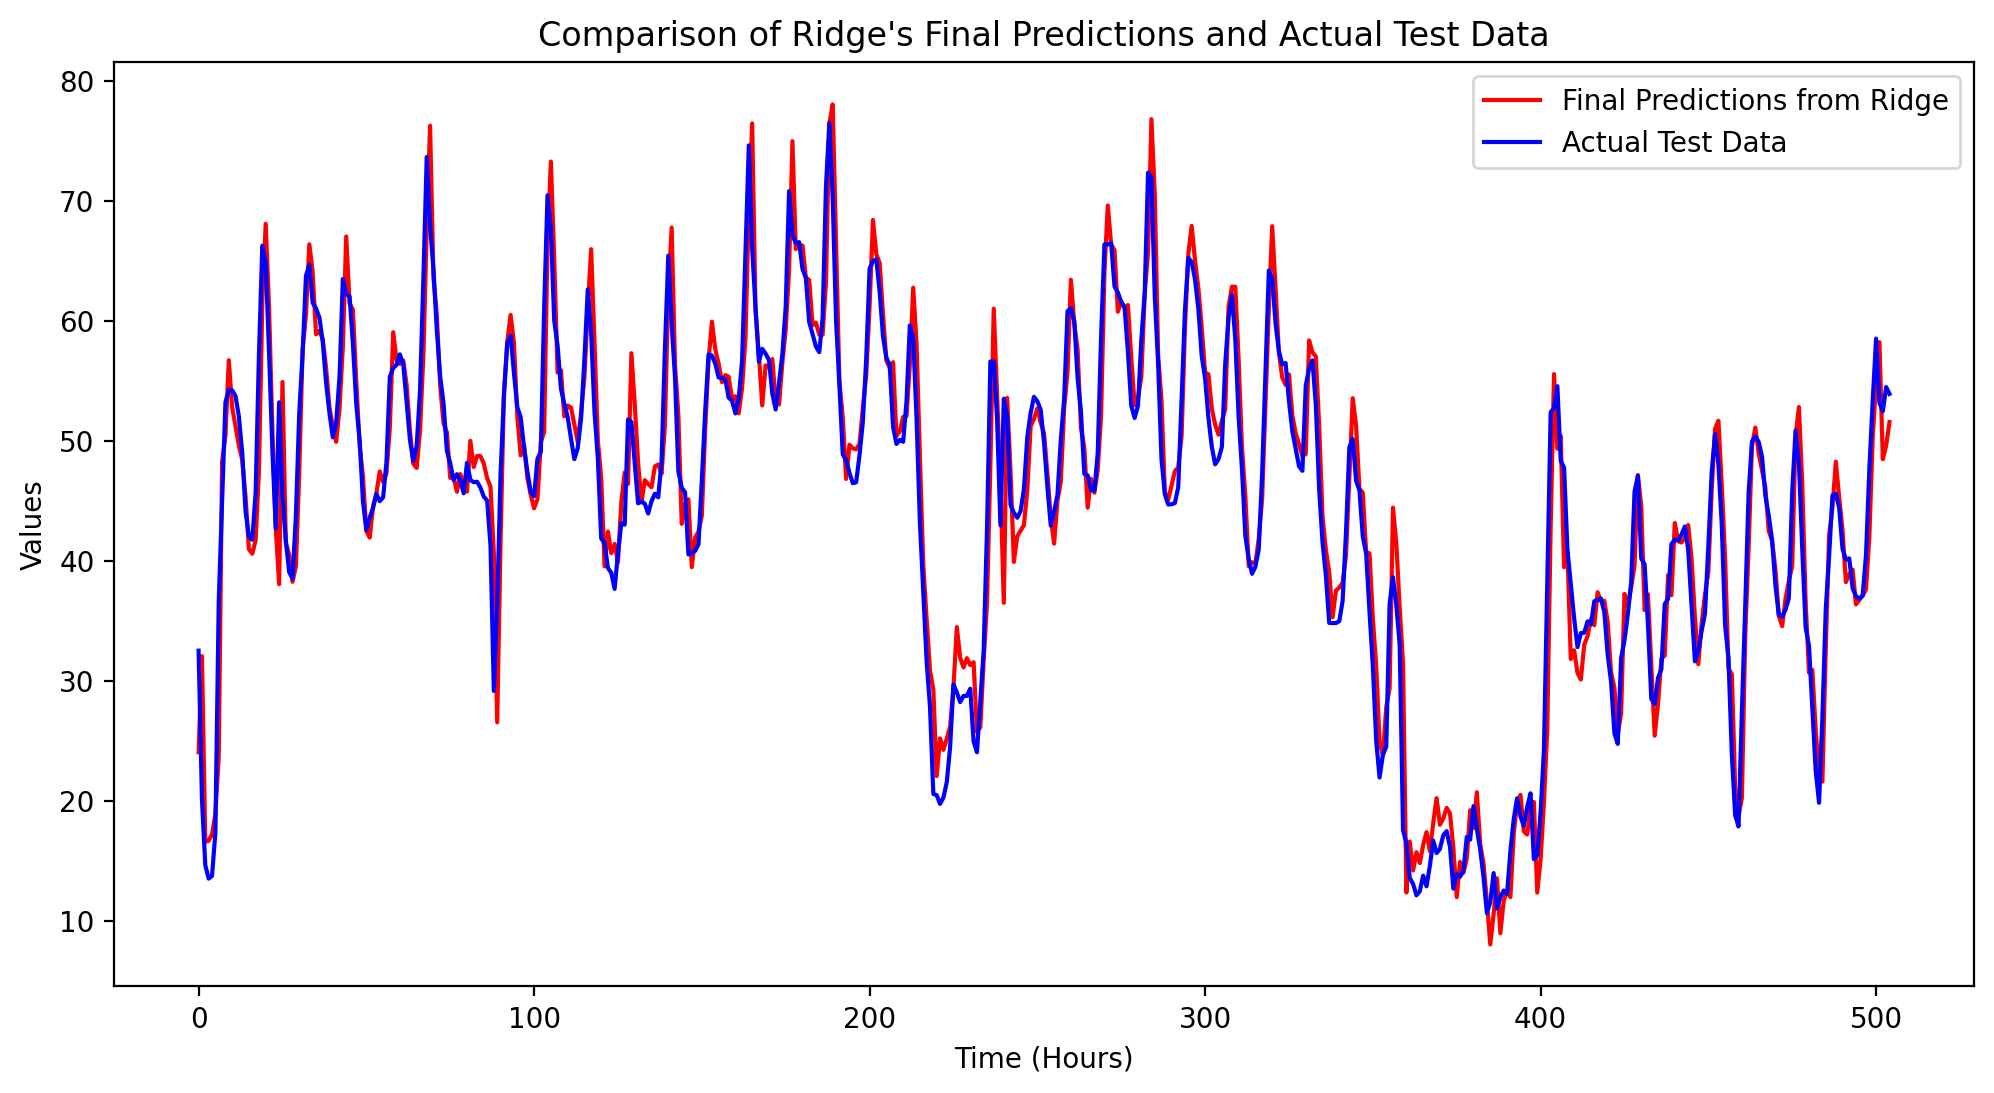

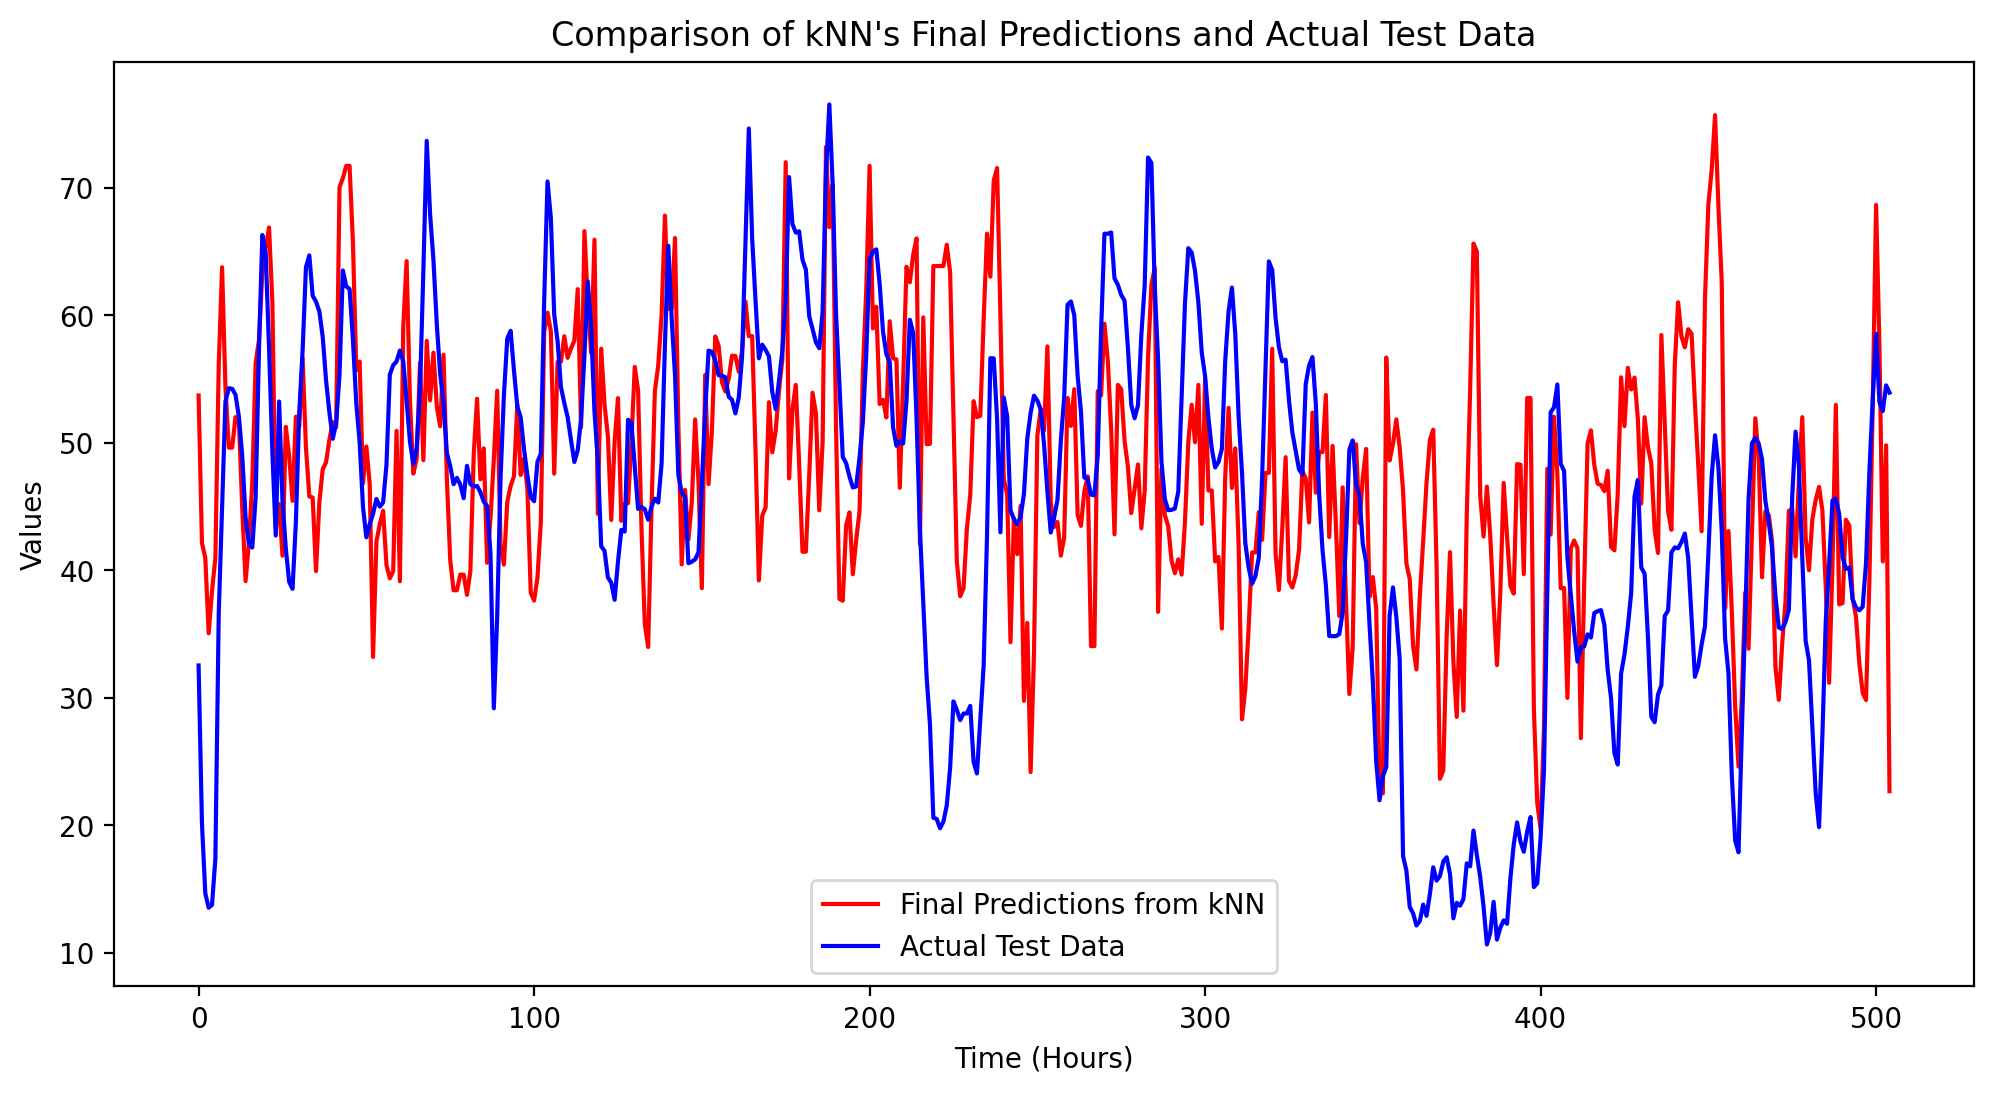

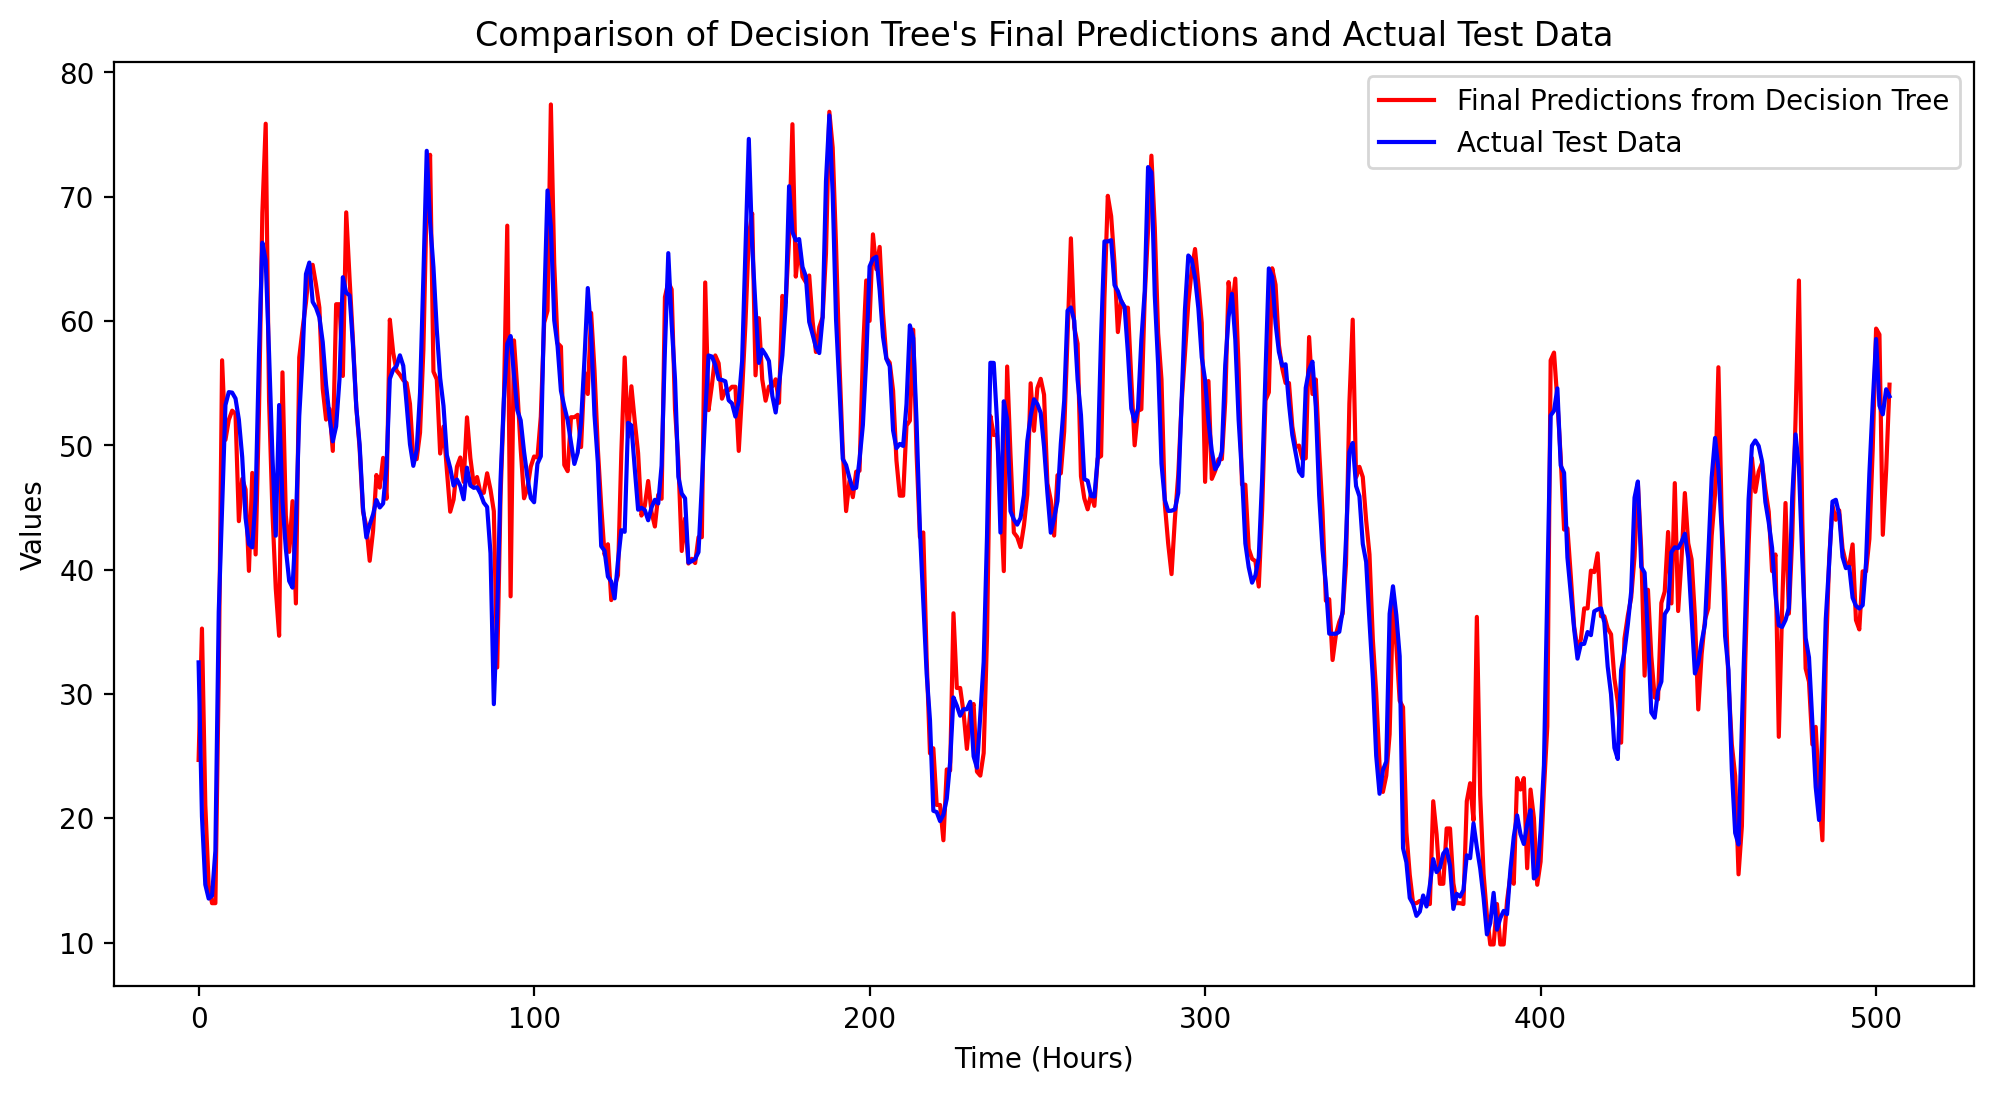

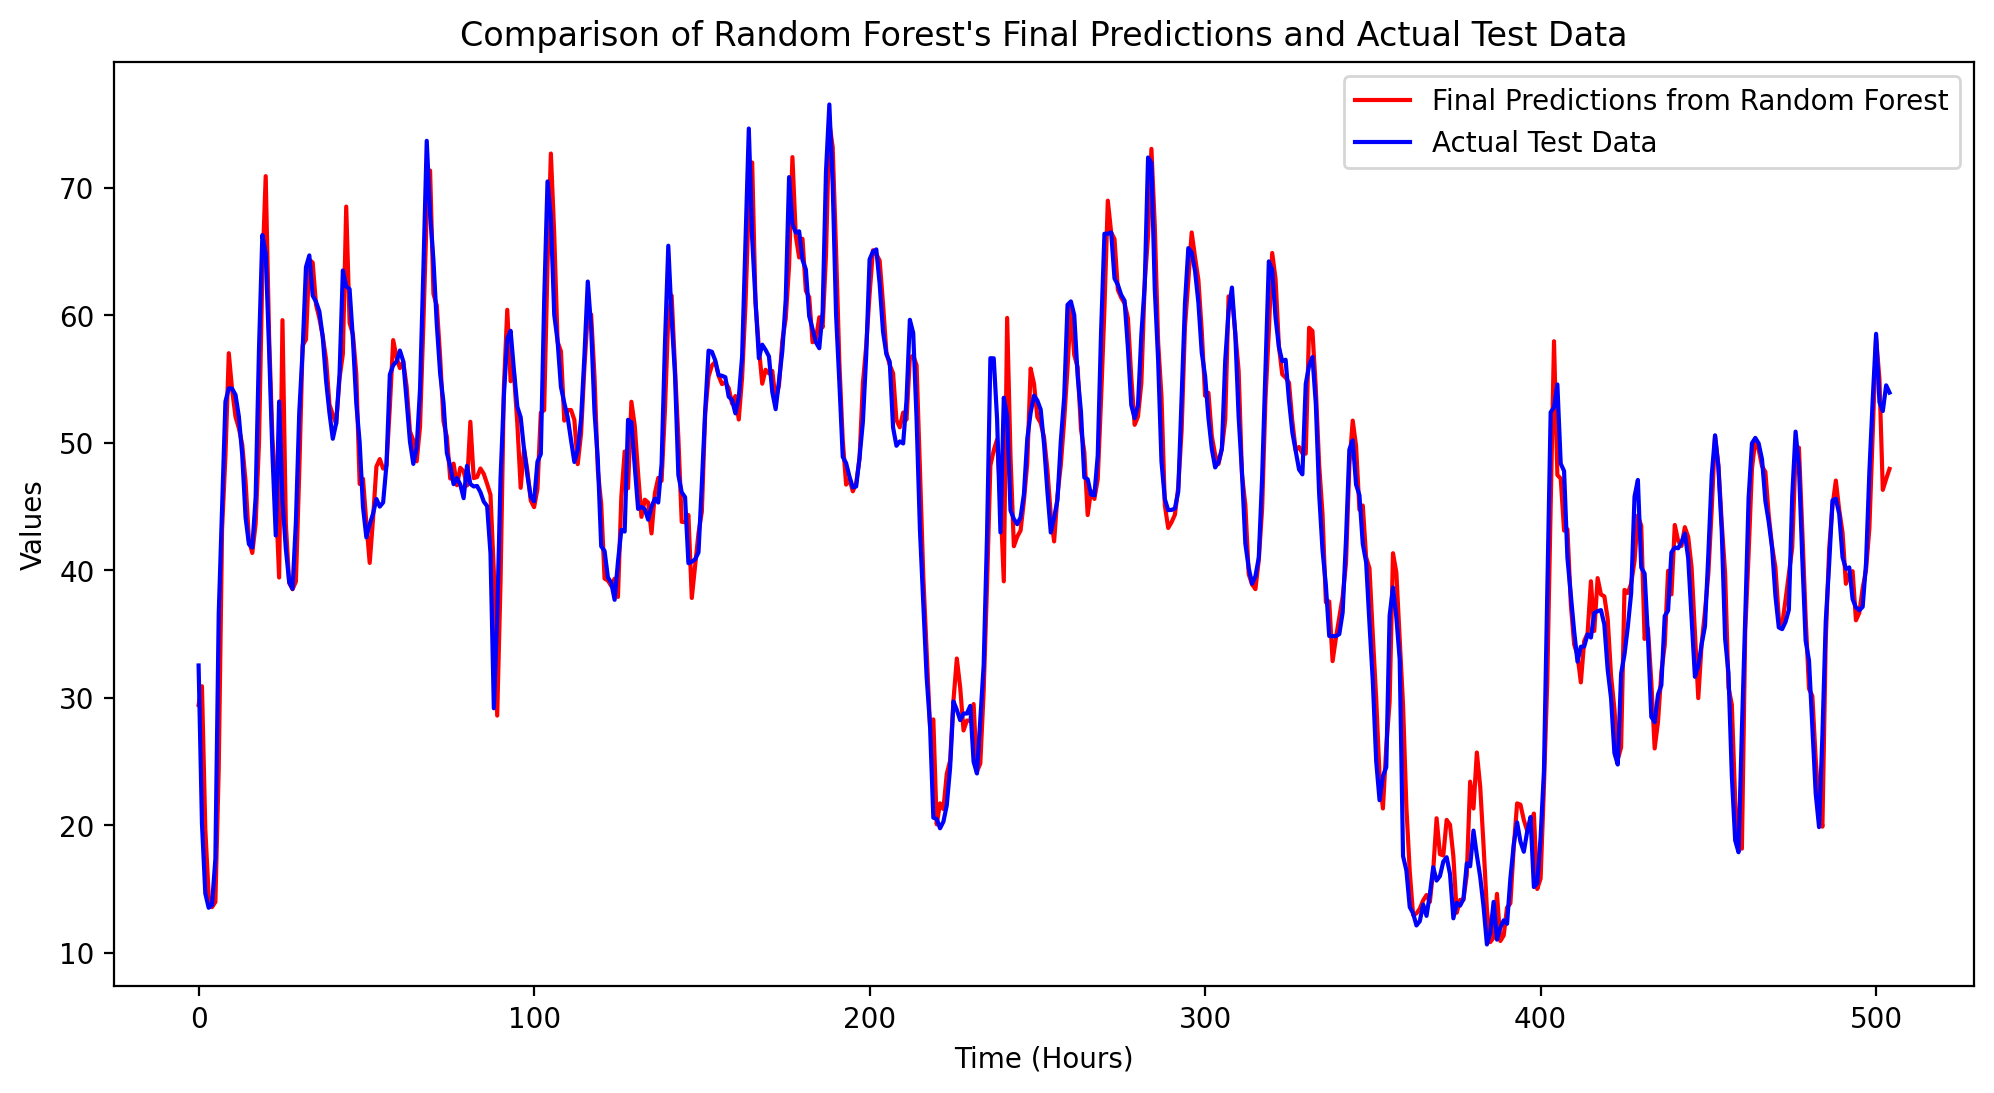

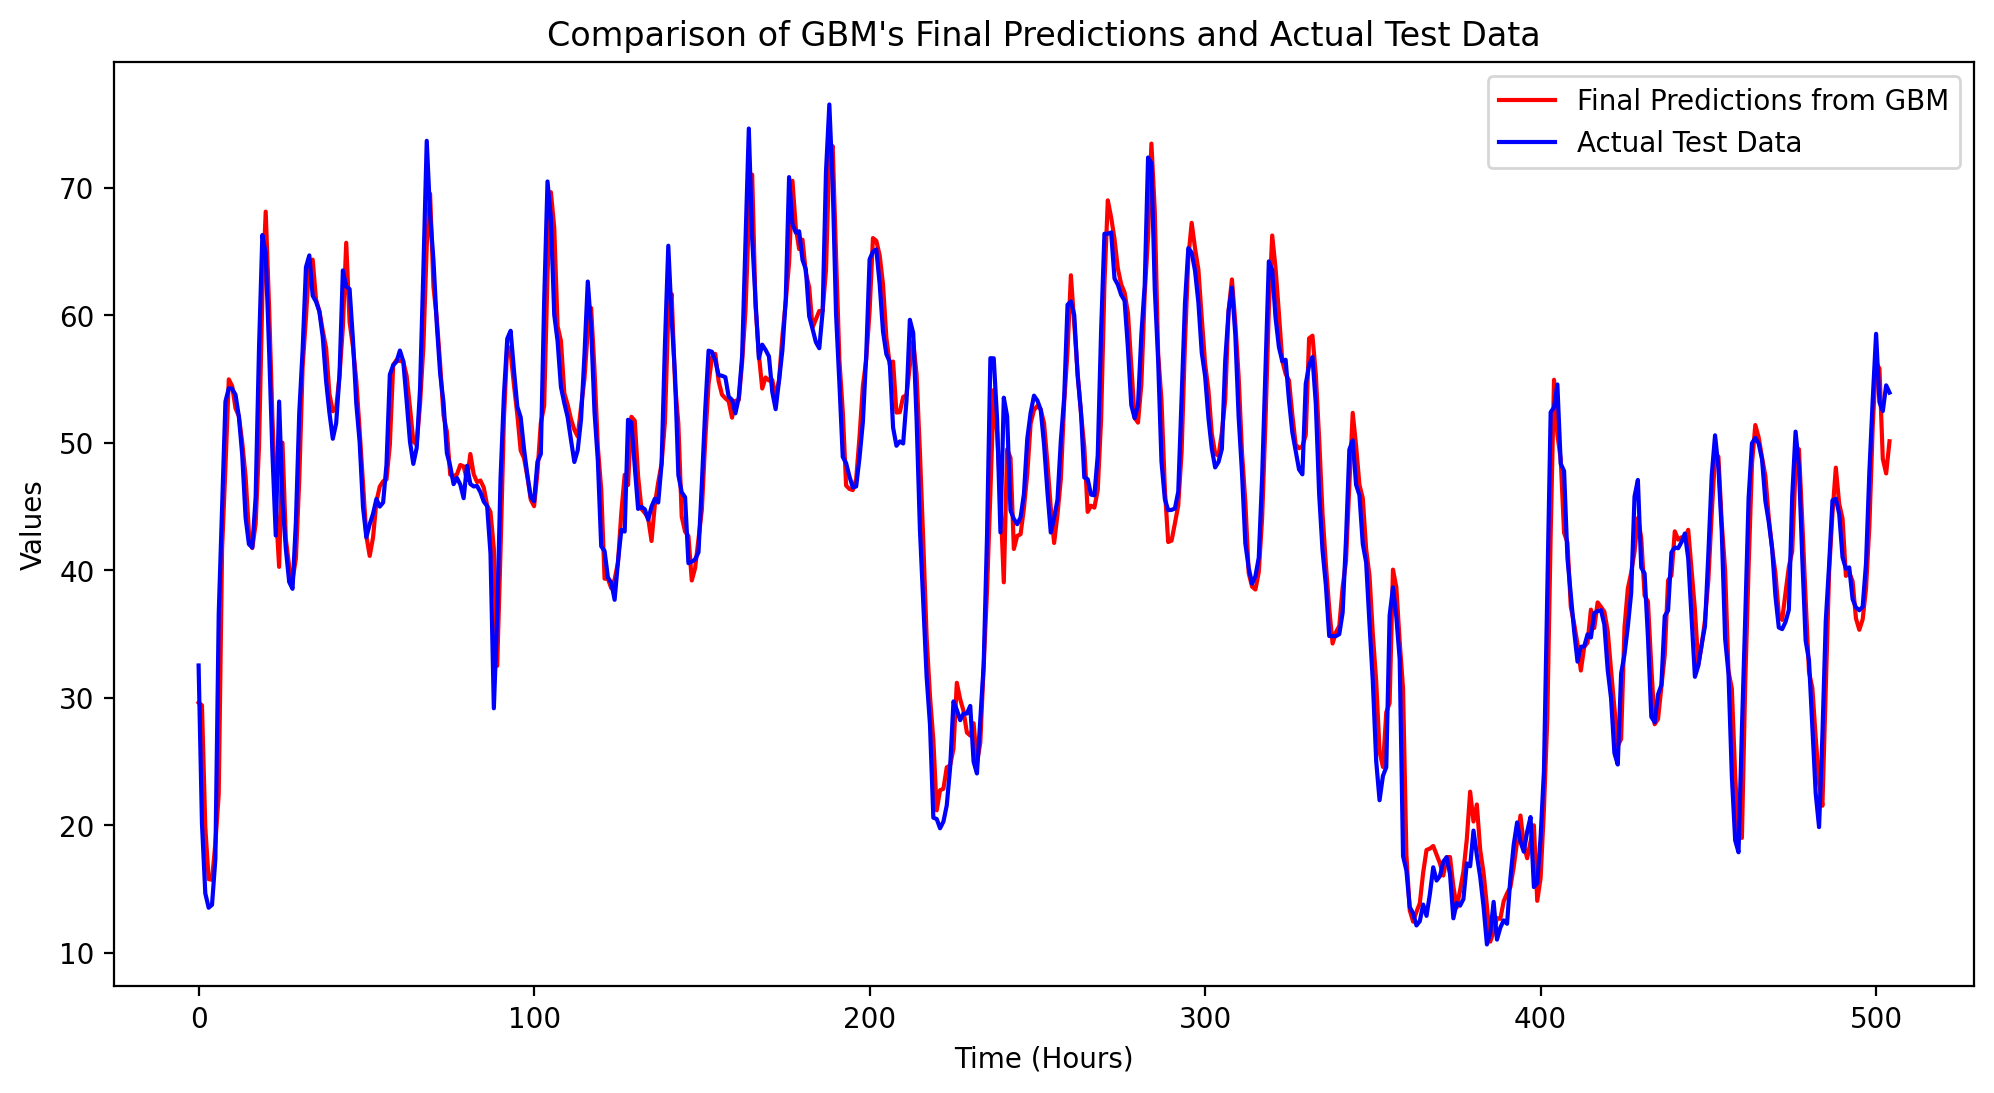

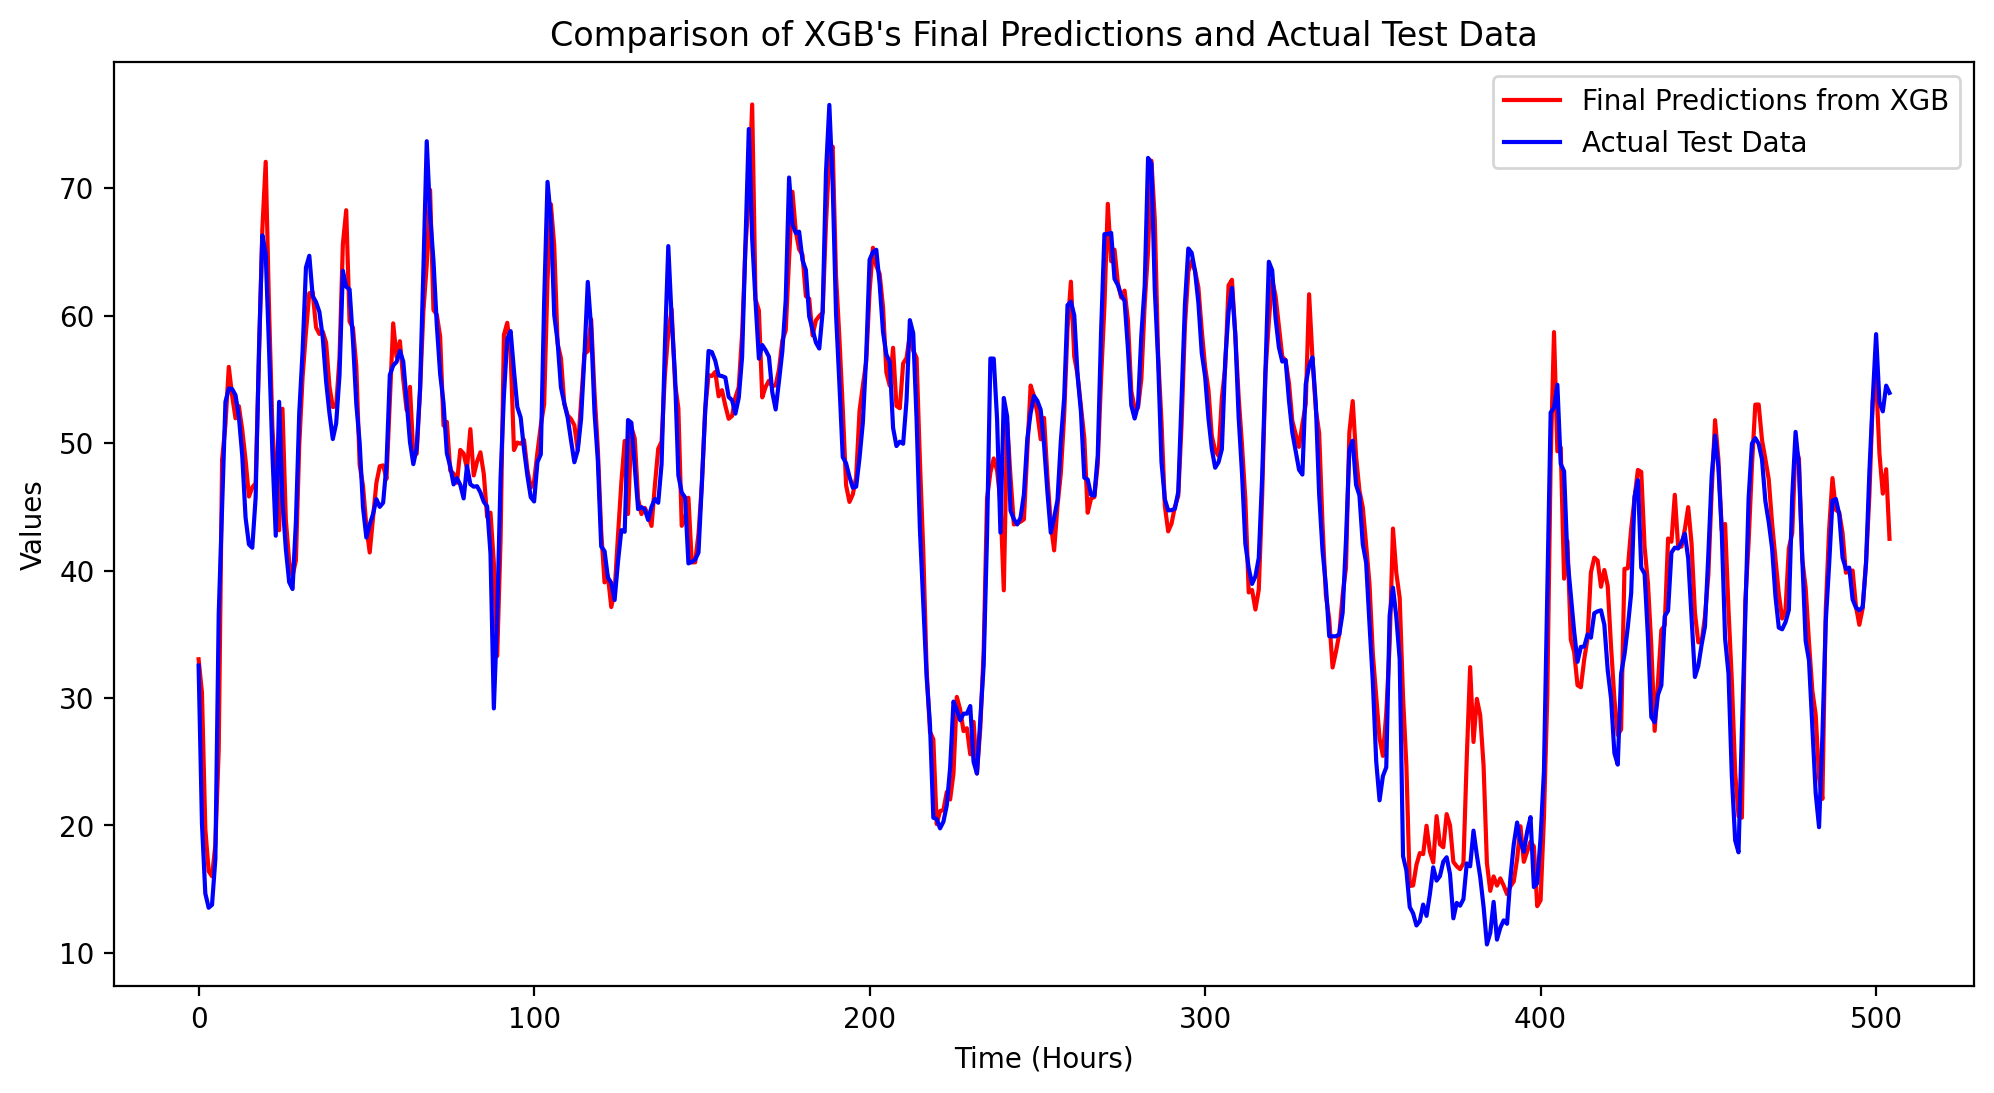

In [44]:
### Plotting and Analysis of Results =========================================

pred = [y_test_LR, y_test_Lasso, y_test_Ridge, y_test_kNN, y_test_DT,
        y_test_RF, y_test_GBM, y_test_XGB]

pred_name = ['Linear Regression', 'Lasso', 'Ridge', 'kNN', 'Decision Tree', 'Random Forest', 'GBM','XGB']

predictions_per_model = []

for p, pn in zip(pred, pred_name):
  # Plotting final predictions and actual test data
  plt.figure(figsize=(12, 6)) # Adjust the size as needed
  plt.plot(p, label=f'Final Predictions from {pn}', color='red')
  plt.plot(y_test.reset_index(drop=True), label='Actual Test Data', color='blue')
  plt.title(f"Comparison of {pn}'s Final Predictions and Actual Test Data")
  plt.xlabel('Time (Hours)')  # Adjust this if needed
  plt.ylabel('Values') # Adjust this based on what you're measuring
  plt.legend()
  plt.show()

##### Finally, we are interested in how effective the Data Preprocessing and Feature Engineering actually is.
Suppose that we subject the raw dataset only to its Preprocessing phase, how well would the ML models do? What if there were no Feature Engineering involved in the first place?

To recap, we used `process_df(df)`, `create_lag(df, 'price actual', lag_hours=7)`, `add_rolling_window_features(df, 'price actual', window_size=24)`, and `add_baseline_prediction(df, 'price actual')` for the pipeline.

For our analysis, we only subject the dataset to the `process_df(df)` and immediately fit it to the models.

In [45]:
# Prepare Dataset
df_2 = df_energy.copy()

# Initial ommitting of variables
df_2 = process_df(df_2)

days = 21

# Splitting the dataset into features and target
X = df_2.drop(['time', 'price actual'], axis=1)
y = df_2['price actual']

# Splitting the dataset into Train, Validation, and Test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
X_train, X_validation, y_train, y_validation = train_test_split(X_trainval, y_trainval, test_size=0.25, shuffle=False)

# Limit the test set to the specified number of days (21 days)
X_test = X_test.iloc[:days * 24 + 1]
y_test = y_test.iloc[:days * 24 + 1]

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#For purpose of Demonstration let's just use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y_train)
Lasso = Lasso()
Lasso.fit(X_train, y_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y_train)
#kNN = KNeighborsRegressor(n_neighbors=8)
kNN = KNeighborsRegressor()
kNN.fit(X_train,y_train)
#DT = DecisionTreeRegressor(max_depth=5)
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
#RF = RandomForestRegressor(n_estimators = 100)
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
#GBM = GradientBoostingRegressor(max_depth =5, learning_rate=.1)
GBM = GradientBoostingRegressor()
GBM.fit(X_train,y_train)
#XGB
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

y_pred_LR = LR.predict(X_validation)
y_pred_Lasso = Lasso.predict(X_validation)
y_pred_Ridge = Ridge1.predict(X_validation)
y_pred_kNN = kNN.predict(X_validation)
y_pred_DT = DT.predict(X_validation)
y_pred_RF = RF.predict(X_validation)
y_pred_GBM = GBM.predict(X_validation)
y_pred_XGB = XGB.predict(X_validation)

y_test_LR = LR.predict(X_test)
y_test_Lasso = Lasso.predict(X_test)
y_test_Ridge = Ridge1.predict(X_test)
y_test_kNN = kNN.predict(X_test)
y_test_DT = DT.predict(X_test)
y_test_RF = RF.predict(X_test)
y_test_GBM = GBM.predict(X_test)
y_test_XGB = XGB.predict(X_test)

##### Looking at the MAE results
of the model, and using the same baseline from the original process, we see that all models completely failed to beat the baseline. Furthermore, they had much larger discrepancy, presenting a discrepancy average ranging from PHP 7 to PHP 10 per hour for all the models.

In [50]:
# Calculate the MAE for the baseline model ==================================
cols = ['Machine Learning Regression Method', 'MAE Validation',	'MAE Test', 'Most Important Feature']
df3 = pd.DataFrame(columns=cols)

# Add rows for each model with their respective R2 scores and most important feature
df3.loc[0] = ['Linear Regression', MAE(y_validation, y_pred_LR), MAE(y_test, y_test_LR), get_most_important_feature_linear(LR, X_train)]
df3.loc[1] = ['Linear Regression + Lasso', MAE(y_validation, y_pred_Lasso), MAE(y_test, y_test_Lasso), get_most_important_feature_linear(Lasso, X_train)]
df3.loc[2] = ['Linear Regression + Ridge', MAE(y_validation, y_pred_Ridge), MAE(y_test, y_test_Ridge), get_most_important_feature_linear(Ridge1, X_train)]
df3.loc[3] = ['kNN', MAE(y_validation, y_pred_kNN), MAE(y_test, y_test_kNN), 'NA']  # kNN does not have feature importance
df3.loc[4] = ['Decision Tree', MAE(y_validation, y_pred_DT), MAE(y_test, y_test_DT), get_most_important_feature_tree(DT, X_train)]
df3.loc[5] = ['Random Forest', MAE(y_validation, y_pred_RF), MAE(y_test, y_test_RF), get_most_important_feature_tree(RF, X_train)]
df3.loc[6] = ['Gradient Boosting Method', MAE(y_validation, y_pred_GBM), MAE(y_test, y_test_GBM), get_most_important_feature_tree(GBM, X_train)]
df3.loc[7] = ['XGBoost',  MAE(y_validation, y_pred_XGB), MAE(y_test, y_test_XGB), get_most_important_feature_tree(XGB, X_train)]


print(f'Baseline MAE: {baseline_mae}')
# Display the DataFrame
display(df3.sort_values('MAE Test', ascending=True))

Baseline MAE: 2.522180515513944


Machine Learning Regression Method  MAE Validation   MAE Test  \
6           Gradient Boosting Method        6.866867   7.971108   
7                            XGBoost        8.713311   8.487905   
1          Linear Regression + Lasso        7.143360   9.389710   
0                  Linear Regression        7.146463   9.433480   
2          Linear Regression + Ridge        7.146463   9.433480   
5                      Random Forest        7.853145  10.825816   
3                                kNN        9.279271  10.848602   
4                      Decision Tree       12.158149  15.559307   

        Most Important Feature  
6  generation fossil hard coal  
7  generation fossil hard coal  
1   generation other renewable  
0   generation other renewable  
2   generation other renewable  
5  generation fossil hard coal  
3                           NA  
4  generation fossil hard coal

##### We further observe how evident the models fail to predict without the employment of Feature Engineering,
by visualizing again the actual target values versus the predicted values.

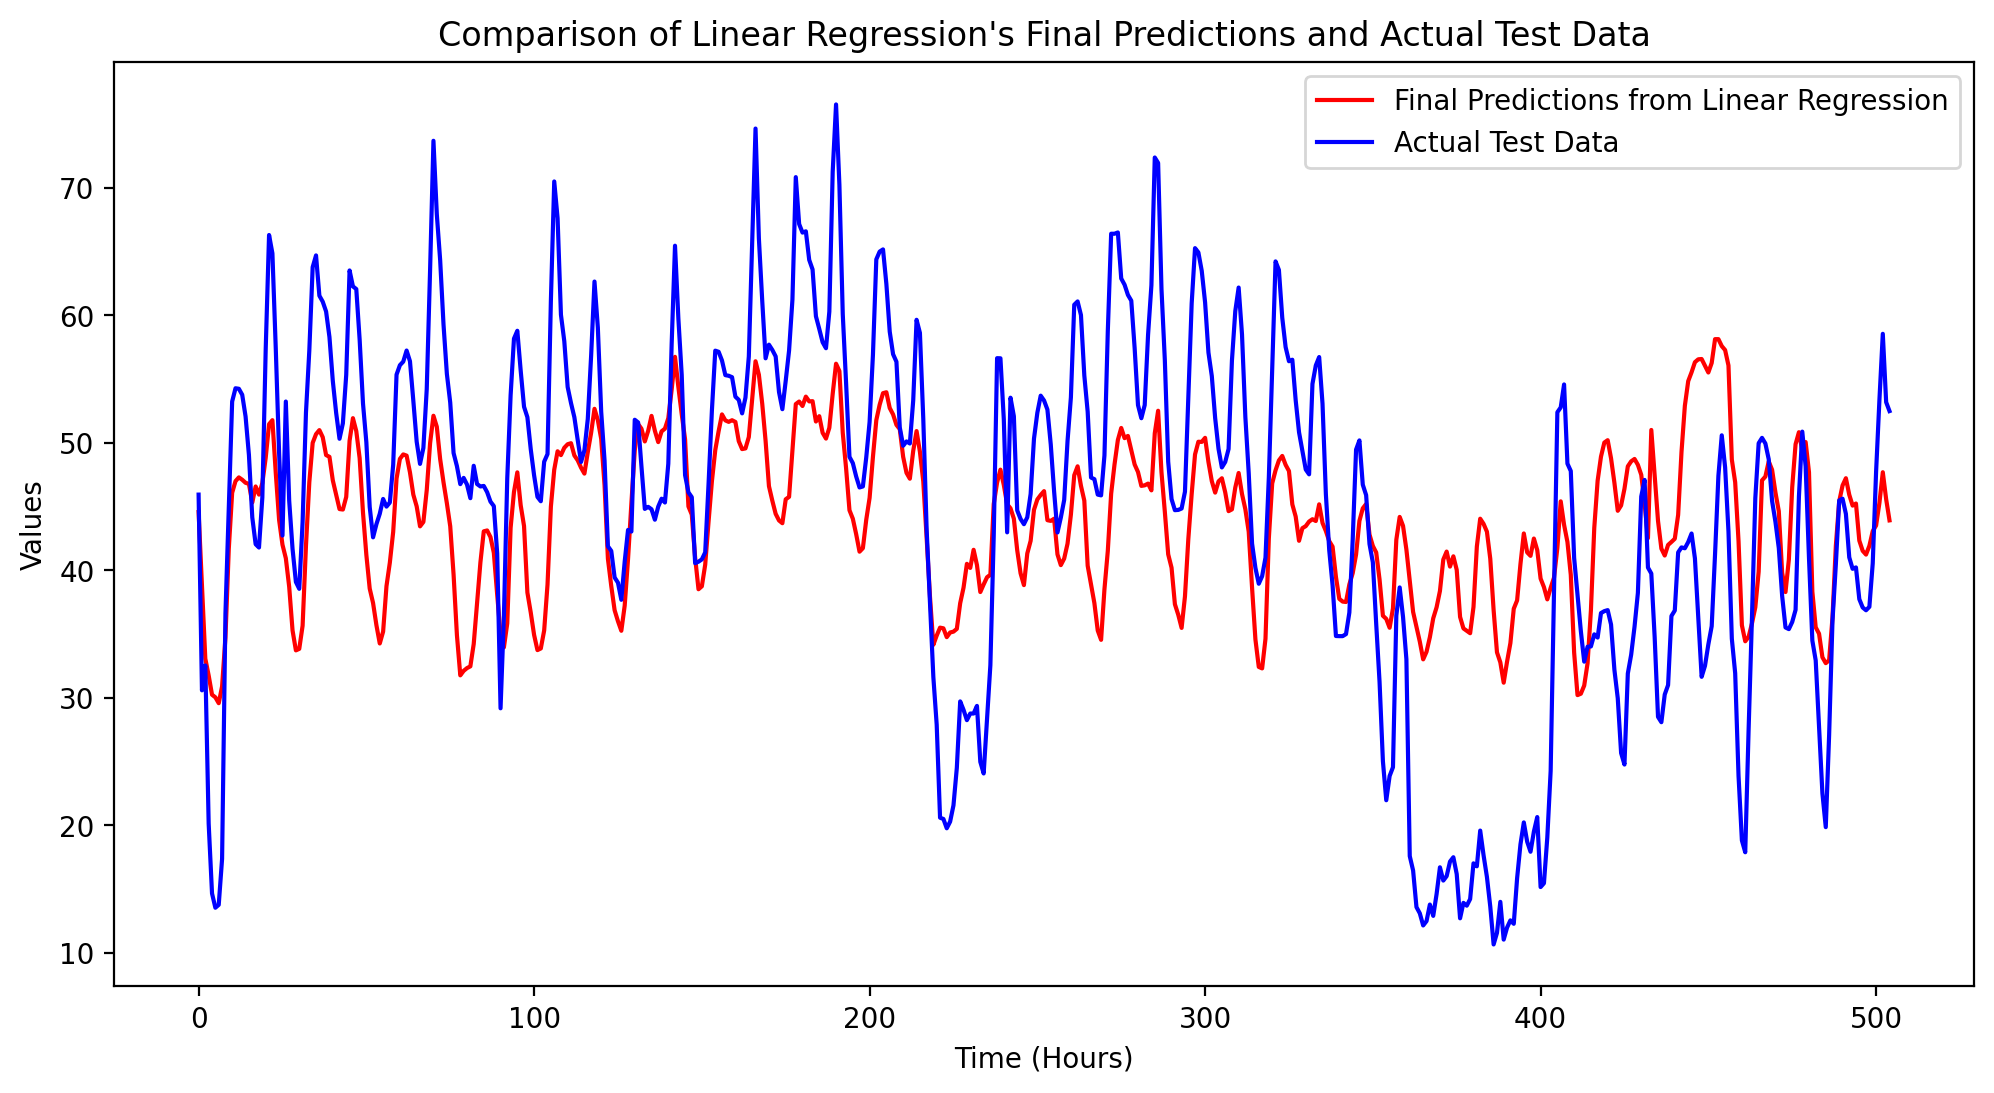

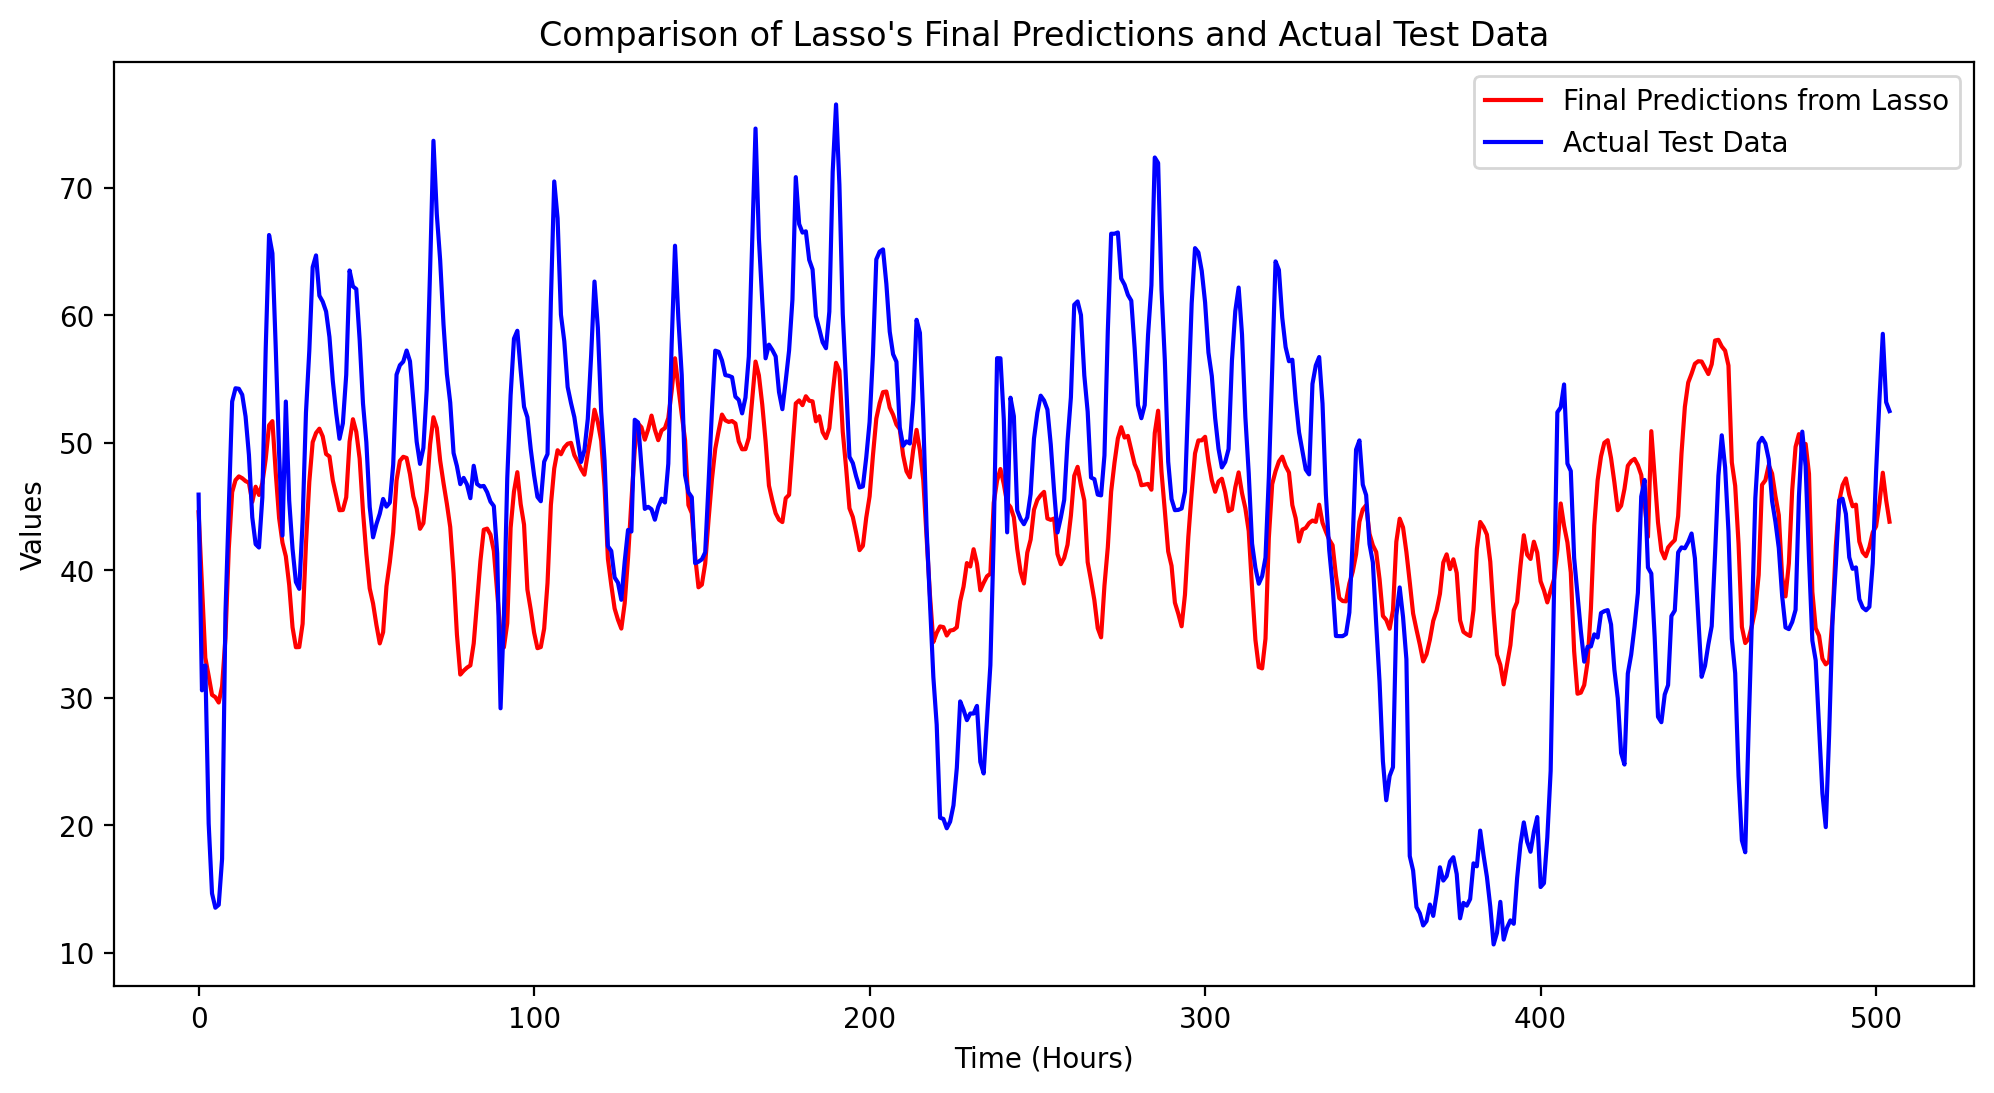

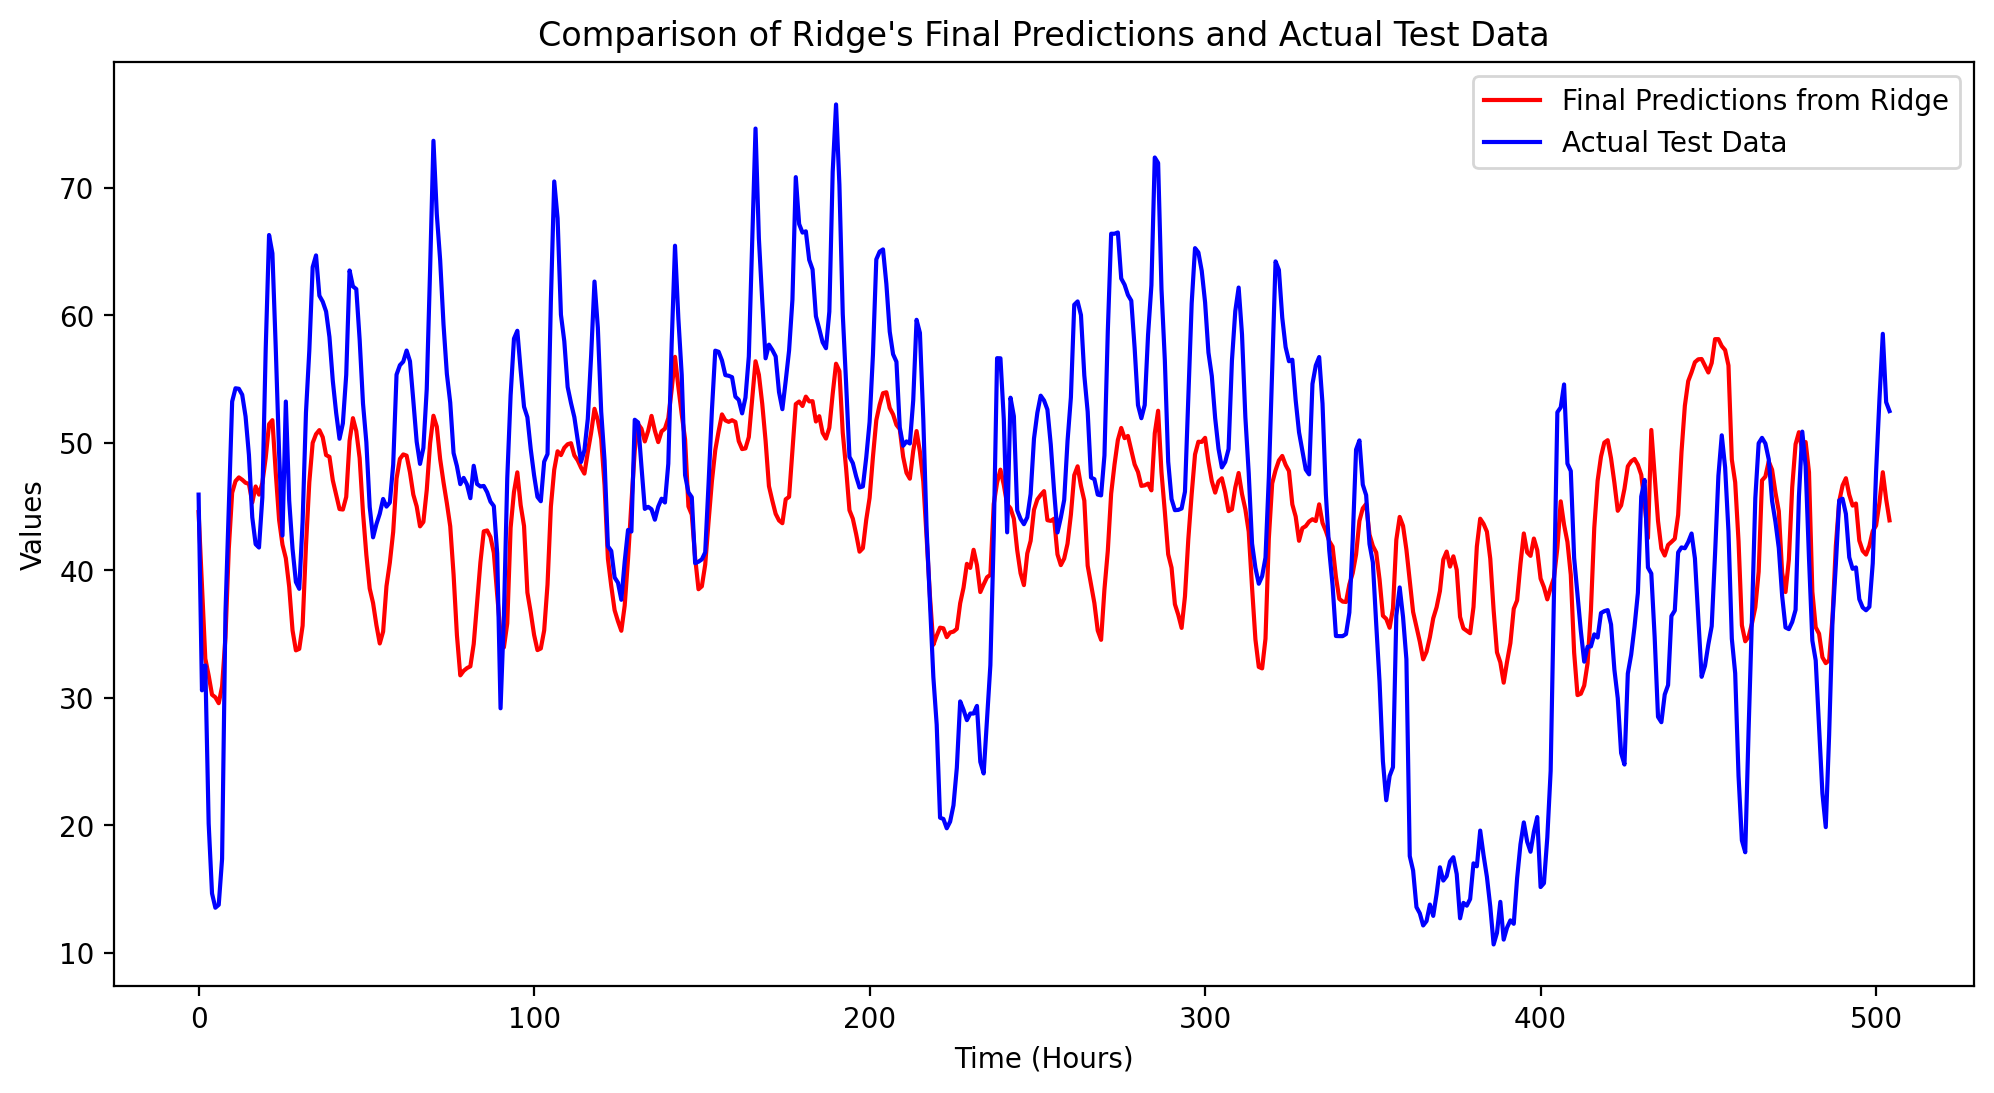

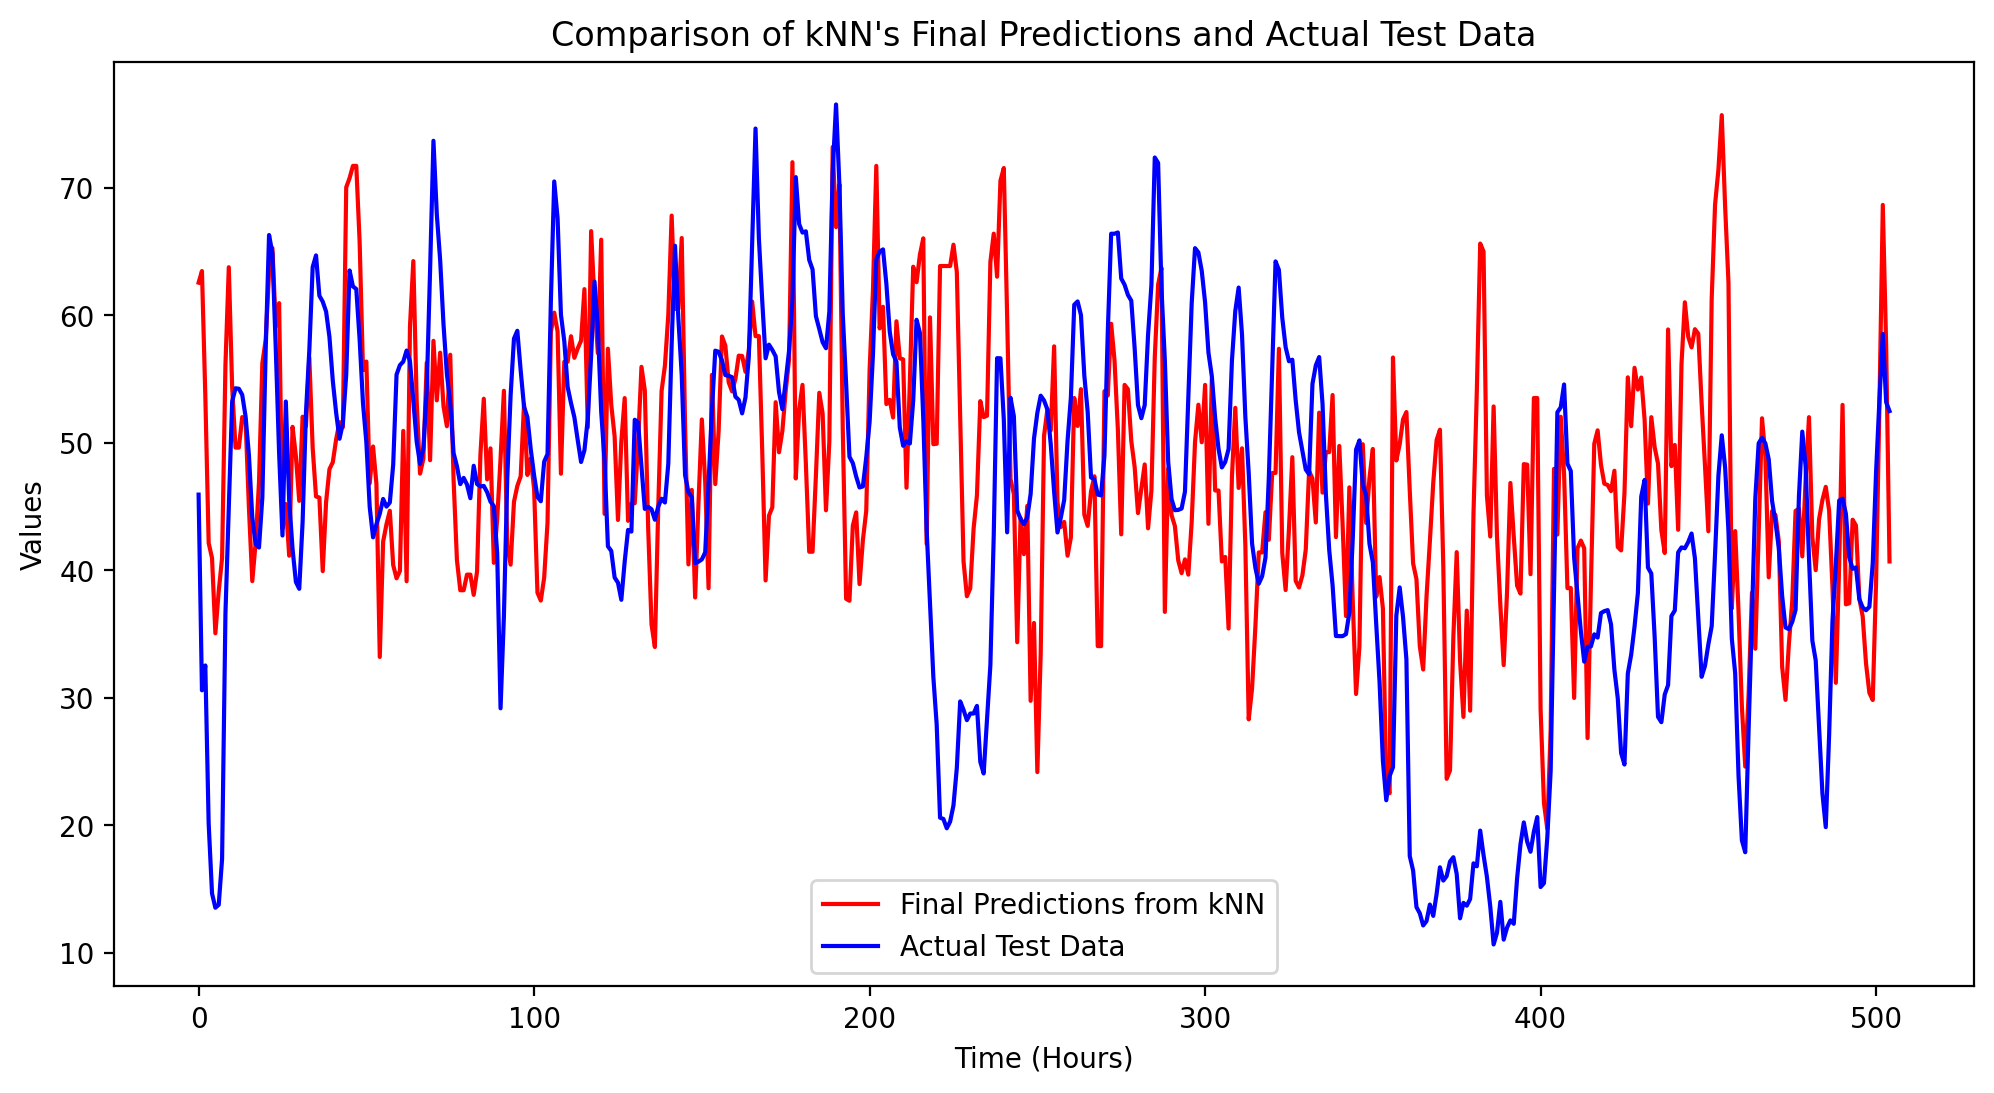

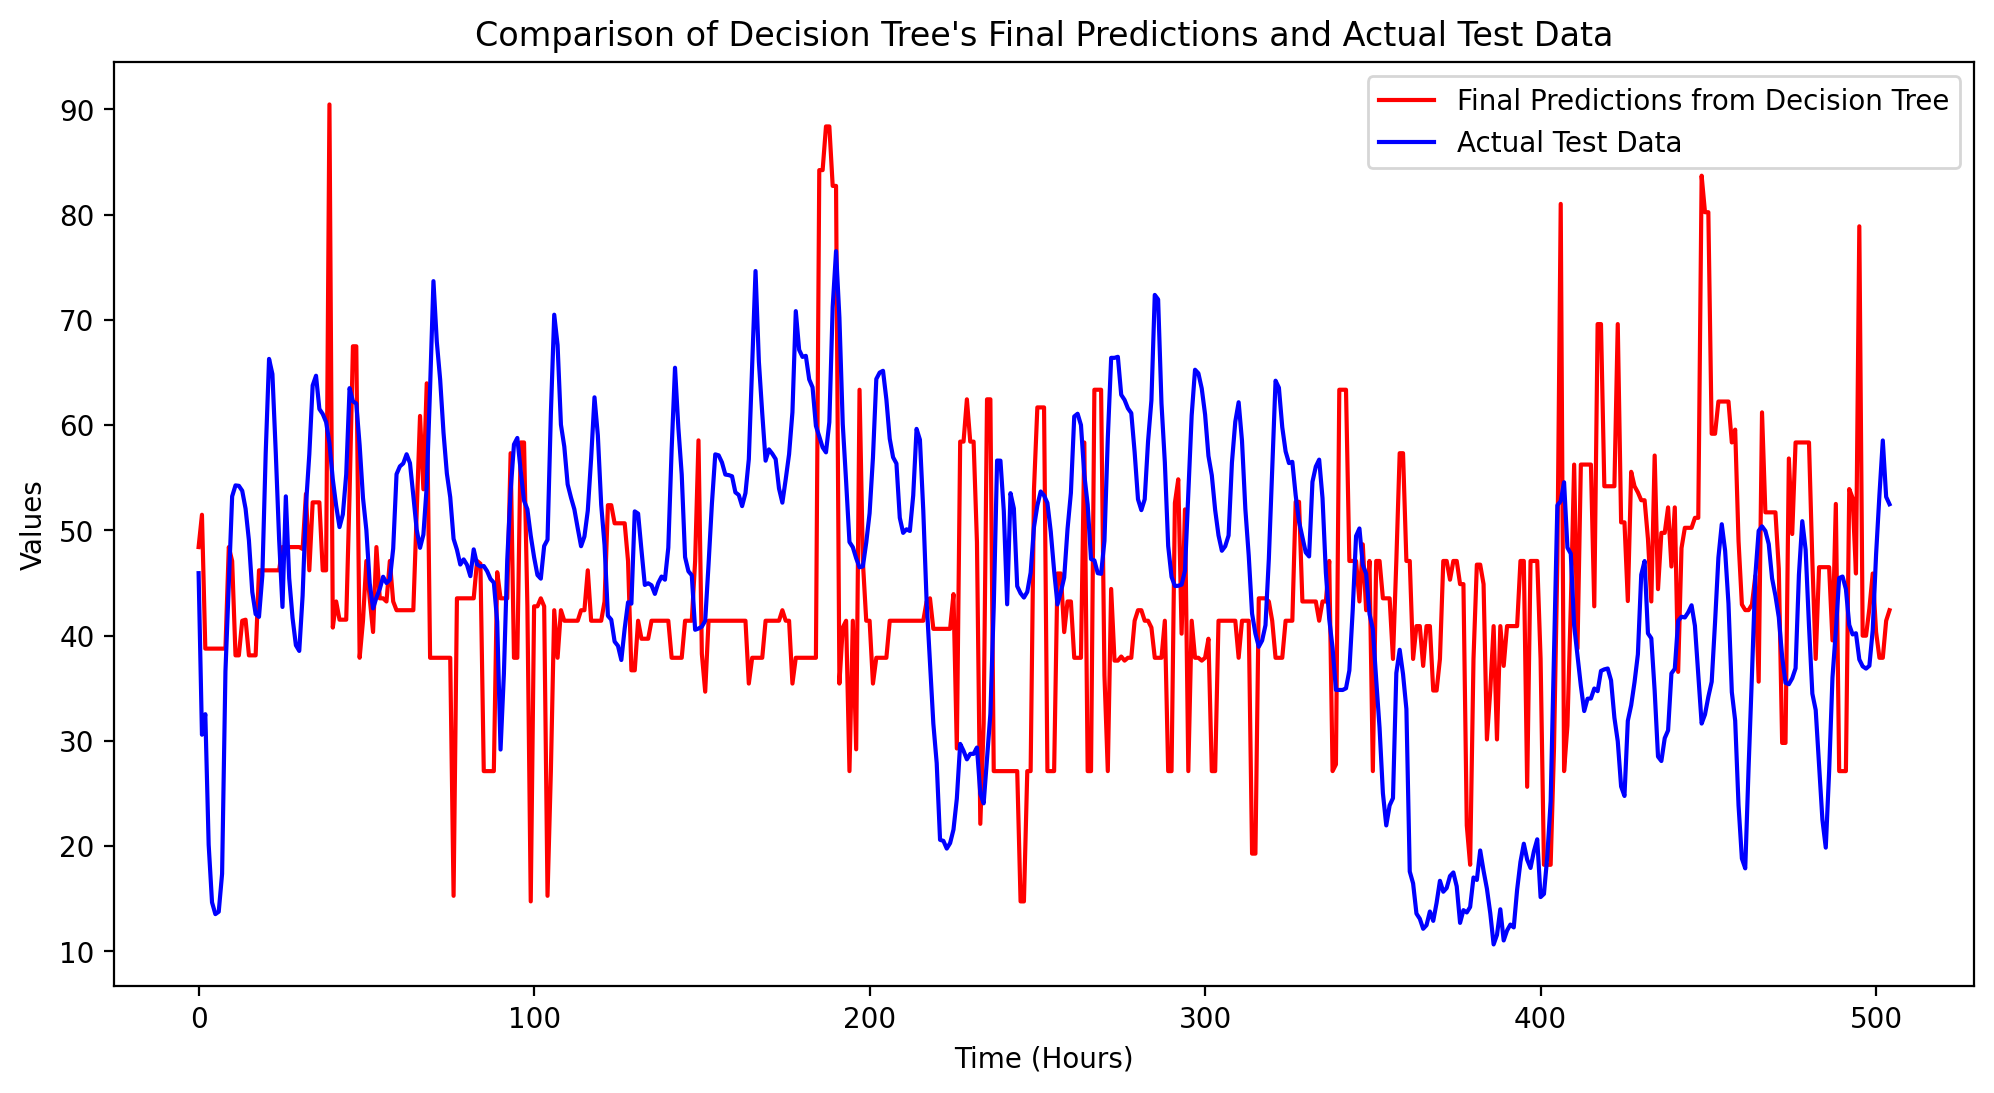

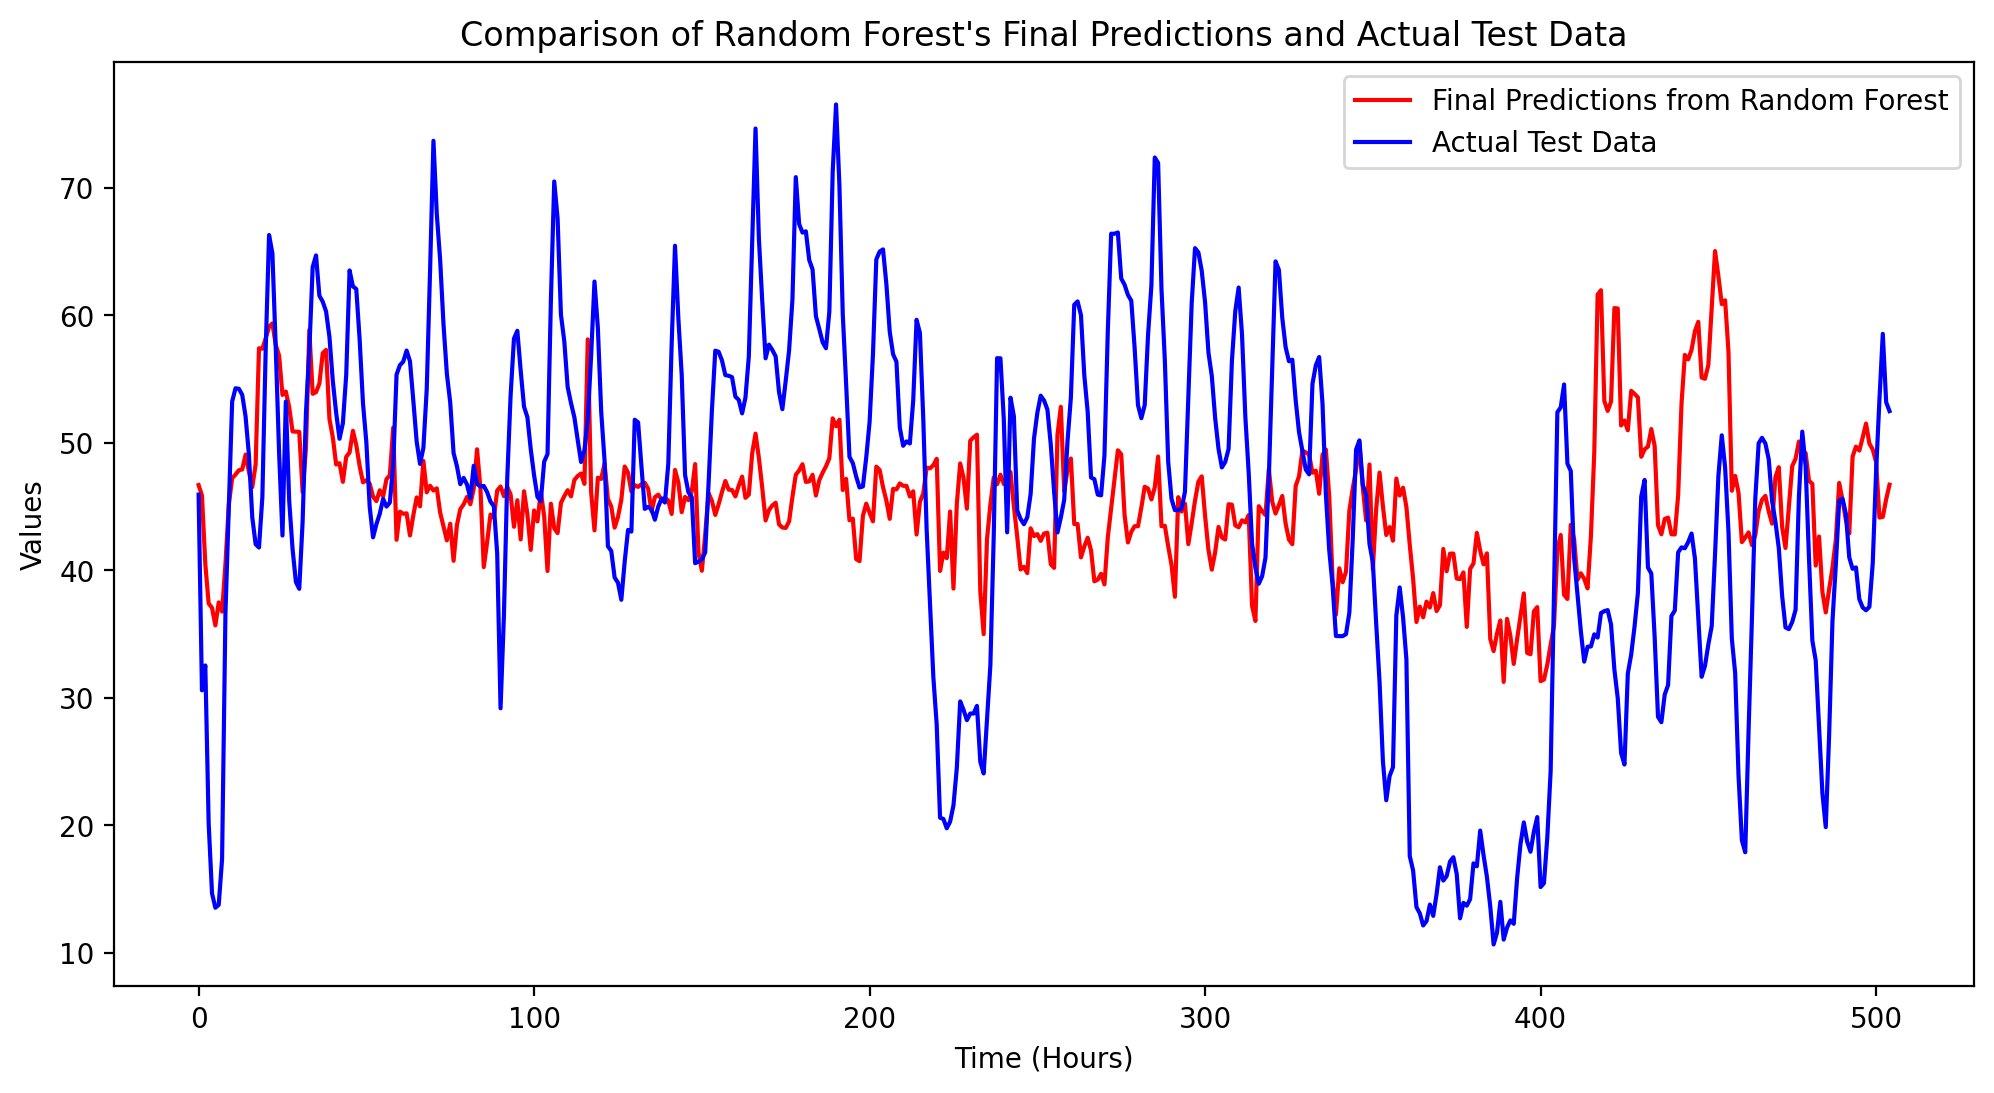

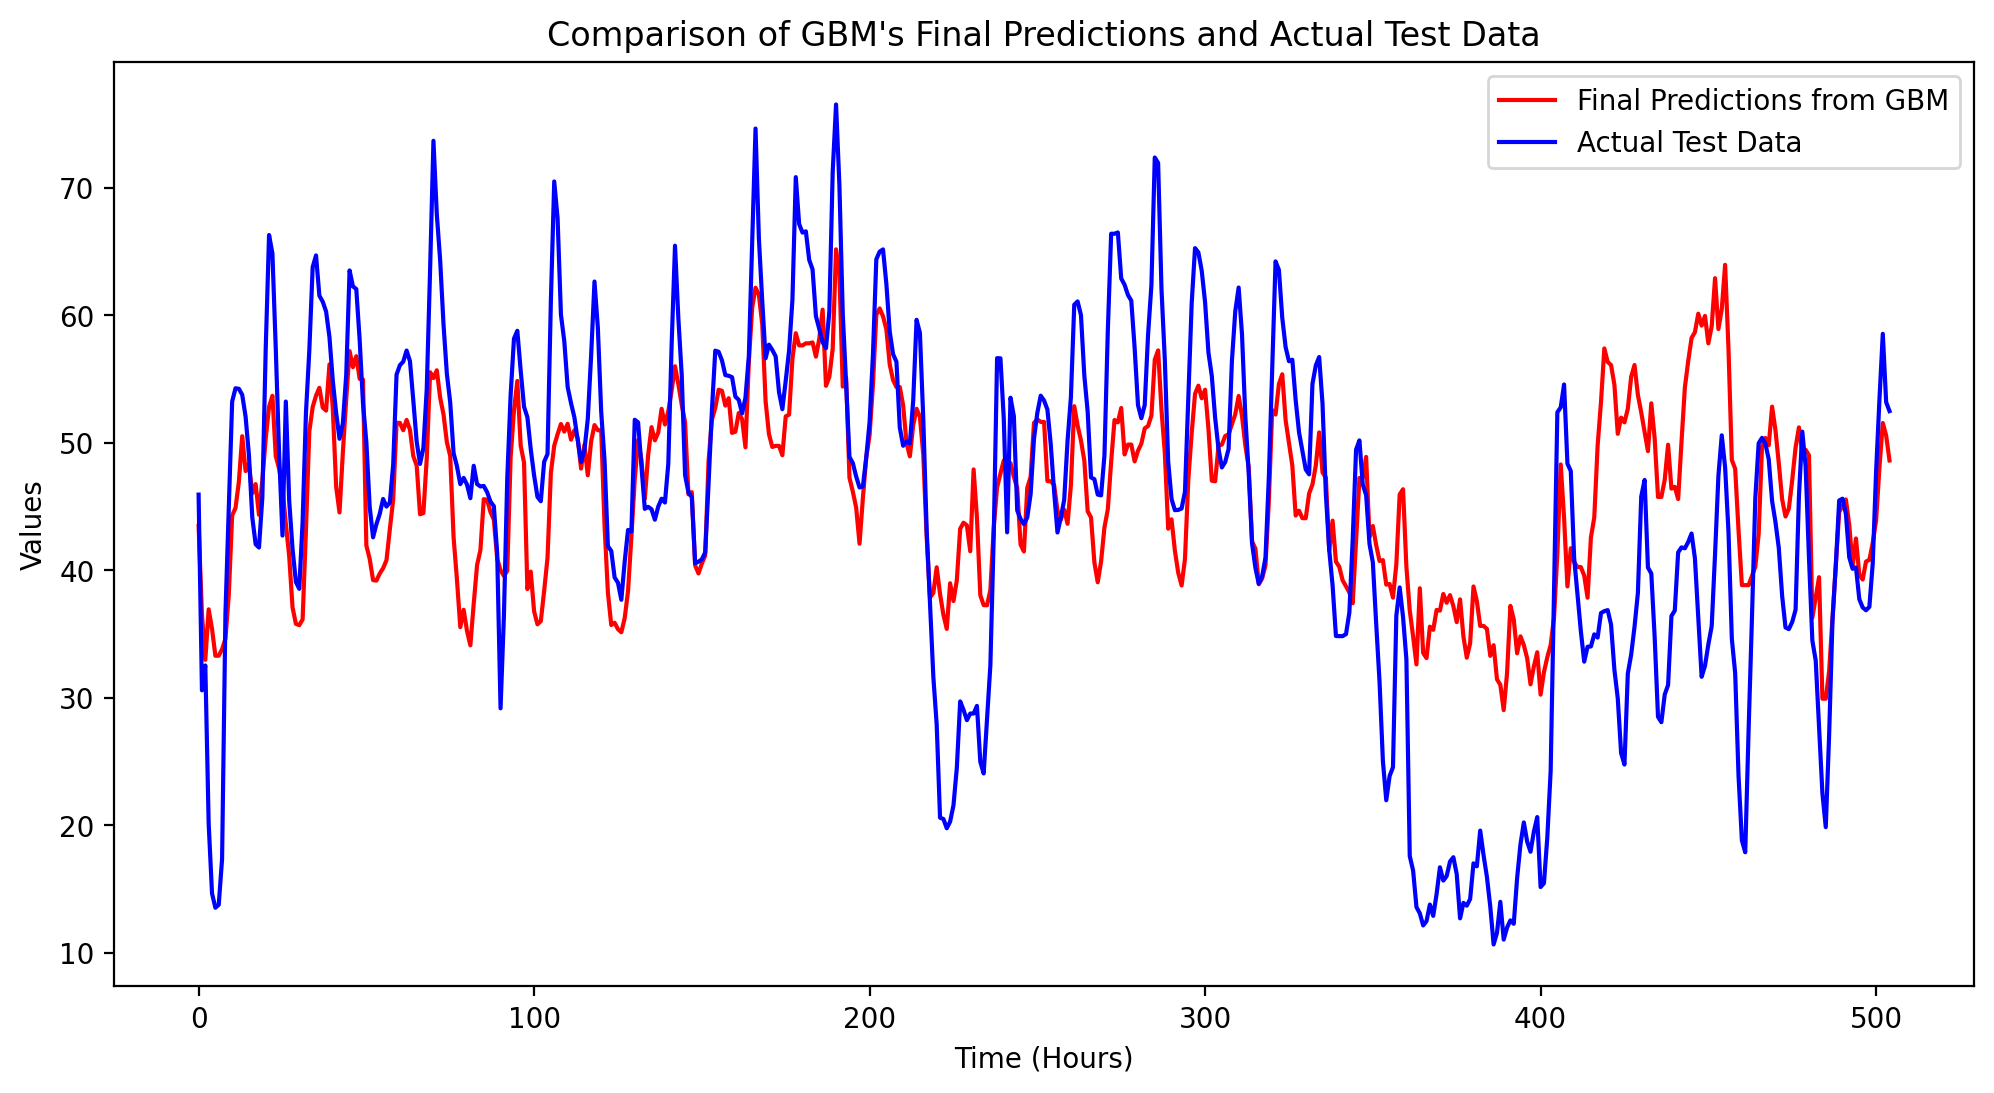

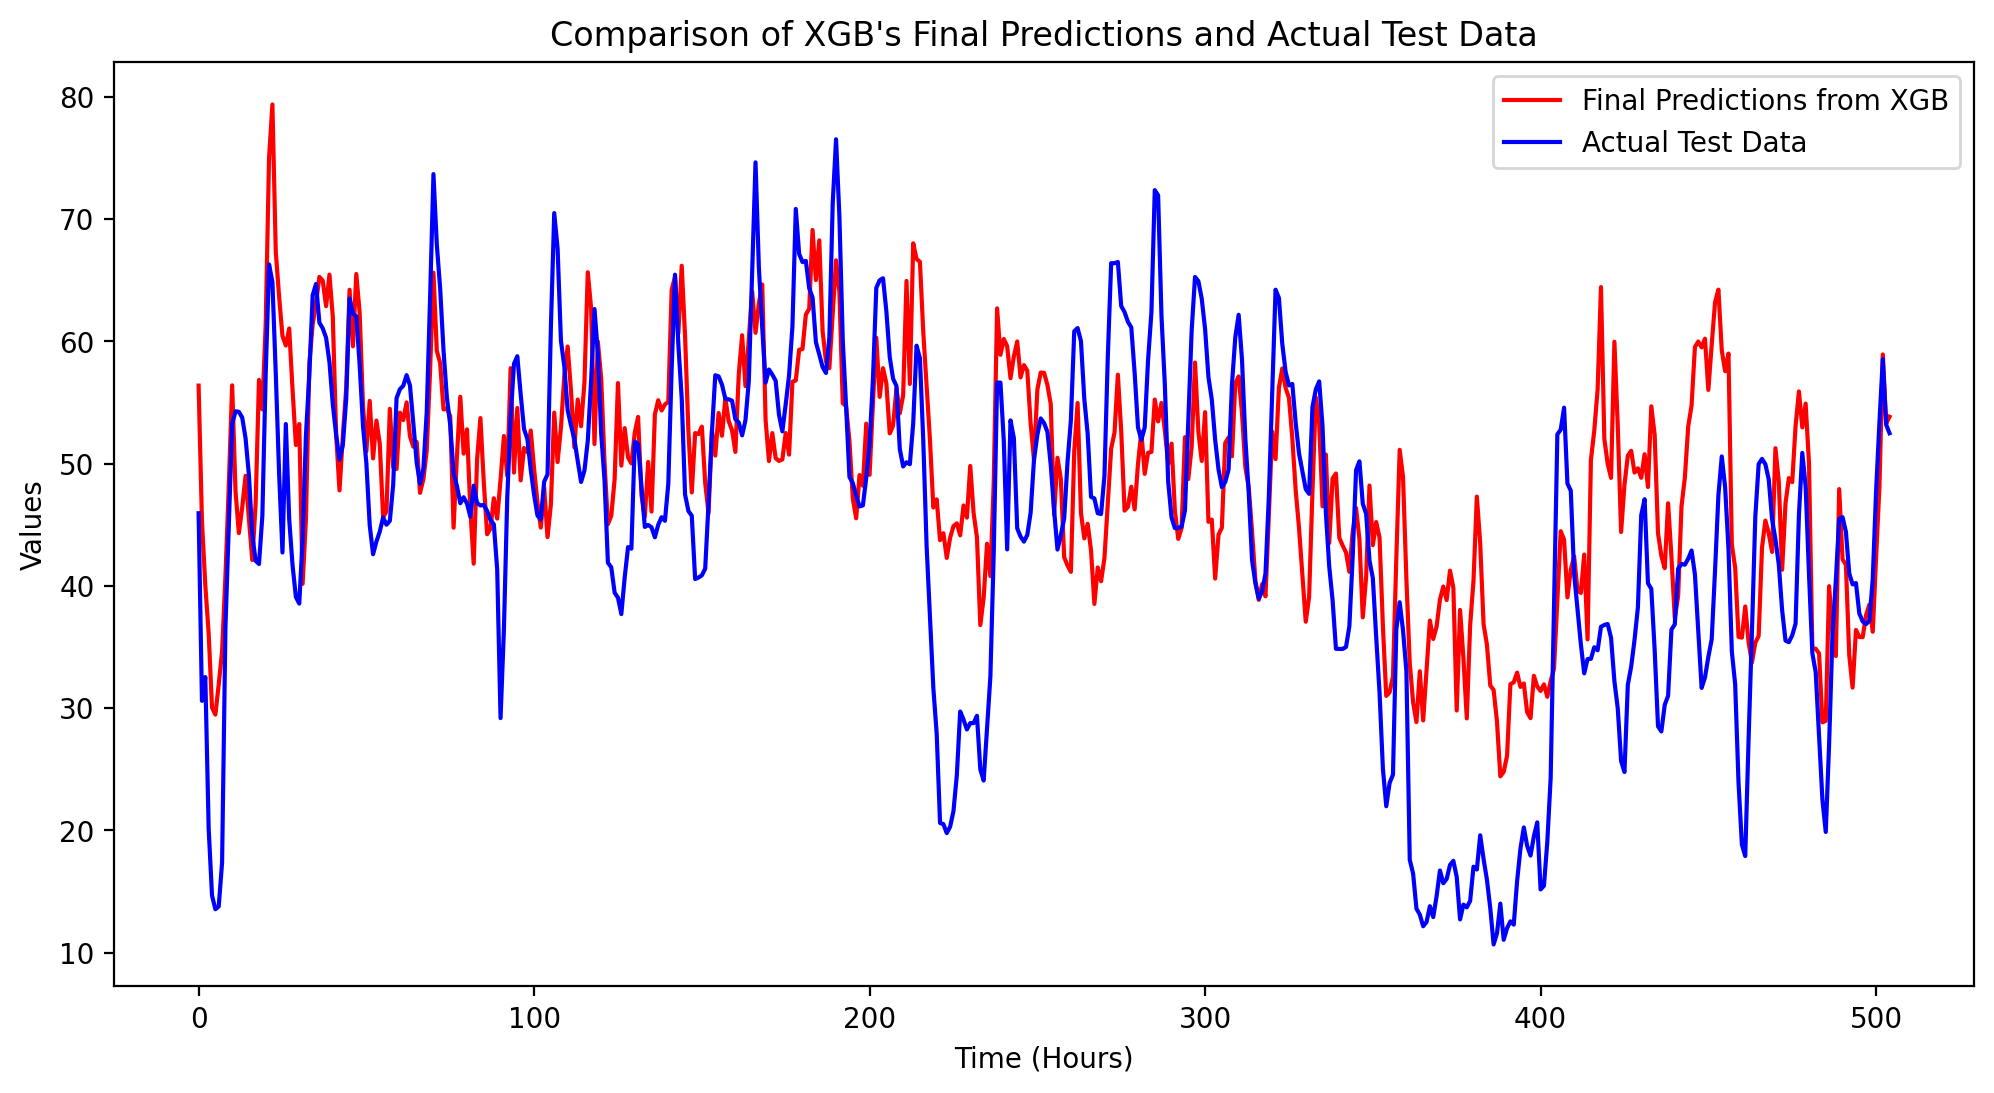

In [51]:
### Plotting and Analysis of Results =========================================

pred = [y_test_LR, y_test_Lasso, y_test_Ridge, y_test_kNN, y_test_DT,
        y_test_RF, y_test_GBM, y_test_XGB]

pred_name = ['Linear Regression', 'Lasso', 'Ridge', 'kNN', 'Decision Tree', 'Random Forest', 'GBM','XGB']

predictions_per_model = []

for p, pn in zip(pred, pred_name):
  # Plotting final predictions and actual test data
  plt.figure(figsize=(12, 6)) # Adjust the size as needed
  plt.plot(p, label=f'Final Predictions from {pn}', color='red')
  plt.plot(y_test.reset_index(drop=True), label='Actual Test Data', color='blue')
  plt.title(f"Comparison of {pn}'s Final Predictions and Actual Test Data")
  plt.xlabel('Time (Hours)')  # Adjust this if needed
  plt.ylabel('Values') # Adjust this based on what you're measuring
  plt.legend()
  plt.show()

##### By implenting the models without any Feature Engineering to the data, we have proved the extreme significance of implementing these first to the data before subjecting them to the Machine Learning models.

<h1 style="background-color: black; color: white; padding: 10px;"><b>Conclusion</b></h1>
From the discussions, we have effectively presented how Data Preprocessing and Feature Engineering are crucial to solving Time Series problems. A comparative analysis highlighting the presence versus absence of Time Series Feature Engineering clearly demonstrates its positive impact on model performance. This is particularly notable as the improvements were achieved even without customizing the parameters of the eight evaluated models, implying the inherent efficacy of these preprocessing techniques.

<h1 style="background-color: black; color: white; padding: 10px;"><b>Recommendation</b></h1>
For future applications, two pivotal factors must be given priority: ensuring data stationarity and the practical applicability of the methodology in real-world scenarios.

1. **Stationarity:** Models often struggle with non-stationary datasets. To address this, applying Time Series Feature Engineering methods like 'differencing' is recommended to stabilize the dataset.

2. **Real-World Applicability:** In real-world scenarios, some input variables may be projections rather than observed values. This necessitates a rigorous model evaluation, possibly through Cross-Validation techniques tailored for Time Series data, to ensure robustness and reliability.

***What to explore next?***

The next phase of exploration should concentrate on models specifically designed for Time Series analysis. These models should inherently possess mechanisms to utilize outputs from previous time steps as inputs for future predictions. Such a capability, essentially creating automatic lag features, will significantly enhance the model's proficiency in handling Time Series data, making it more adept at forecasting with temporal dynamics in mind.



<h1 style="background-color: black; color: white; padding: 10px;"><b>References</b></h1>

    Brownlee, J. (n.d.). Feature selection for time series forecasting with Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

    DotData. (n.d.). Practical guide for feature engineering of time series data. Retrieved from https://dotdata.com/blog/practical-guide-for-feature-engineering-of-time-series-data/

    Jhana, N. (n.d.). Energy Consumption, Generation, Prices, and Weather Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?select=energy_dataset.csv
